![image](https://py-rates.fr/assets/welcomePage/logoSmall.png)

# PyratesIA - Feature Exploration

This notebook provides various pices of code to explore and visualize the features generated for Pyrates. 
- Input: The pickles generated by the feature_engineering notebook (pickle/FEATURES, pickle/FEATURES_CONSTANTS, pickle/RECEIVED_HELP_KEYS, pickle/FEATURES_SETS_KEY) 
- Output: None (visualizations and tables are directly printed in the ntoebook)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline
from dateutil import parser
from locale import normalize
import ipywidgets as widgets
from IPython import display
from statistics import mean
import pickle
pd.options.display.max_rows = 999 #to be able to print full matrices

## 1) Load Pickles

In [20]:
with open('pickle/FEATURES_CONSTANTS', 'rb') as f:
    ALL_KEYS = pickle.load(f)

with open('pickle/FEATURES', 'rb') as f:
    levels_processed_dataframes = pickle.load(f)
    
with open('pickle/RECEIVED_HELP_KEYS', 'rb') as f:
    RECEIVED_HELP_KEYS = pickle.load(f)
    
with open('pickle/FEATURES_SETS_KEY', 'rb') as f:
    FEATURES_SETS = pickle.load(f)

## 2) Features and Labels exploration

### Raw summative data about labels (help type) distribution

In [10]:
LABELS_KEY = "help_type"
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    print(levels_processed_dataframes[level_key][LABELS_KEY].value_counts())
    print("Total = ", len(levels_processed_dataframes[level_key][LABELS_KEY]))
    print(levels_processed_dataframes[level_key][LABELS_KEY].value_counts(normalize=True))

------------------ Level1 ------------------
1    91
2    51
0    22
3    12
Name: help_type, dtype: int64
Total =  176
1    0.517045
2    0.289773
0    0.125000
3    0.068182
Name: help_type, dtype: float64
------------------ Level2 ------------------
2    13
0    10
3     7
1     5
Name: help_type, dtype: int64
Total =  35
2    0.371429
0    0.285714
3    0.200000
1    0.142857
Name: help_type, dtype: float64
------------------ Level3 ------------------
1    136
2    134
3     69
0     69
Name: help_type, dtype: int64
Total =  408
1    0.333333
2    0.328431
3    0.169118
0    0.169118
Name: help_type, dtype: float64
------------------ Level4 ------------------
2    122
3     97
1     97
0     22
Name: help_type, dtype: int64
Total =  338
2    0.360947
3    0.286982
1    0.286982
0    0.065089
Name: help_type, dtype: float64
------------------ Level5 ------------------
1    58
2    53
3    35
0    18
Name: help_type, dtype: int64
Total =  164
1    0.353659
2    0.323171
3    0.213415

Print how many students actually received help at least once

In [16]:
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    print("Nb unique students who got help at least once", len(levels_processed_dataframes[level_key]["student_id"].value_counts()))

------------------ Level1 ------------------
Nb unique students who got help at least once 120
------------------ Level2 ------------------
Nb unique students who got help at least once 27
------------------ Level3 ------------------
Nb unique students who got help at least once 185
------------------ Level4 ------------------
Nb unique students who got help at least once 173
------------------ Level5 ------------------
Nb unique students who got help at least once 106
------------------ Level6 ------------------
Nb unique students who got help at least once 51
------------------ Level7 ------------------
Nb unique students who got help at least once 14
------------------ Level8 ------------------
Nb unique students who got help at least once 6


Visualize the distribution of the labels per game level

------------------ Level1 ------------------
Number of instances : 176, Number of features : 203
Class distribution


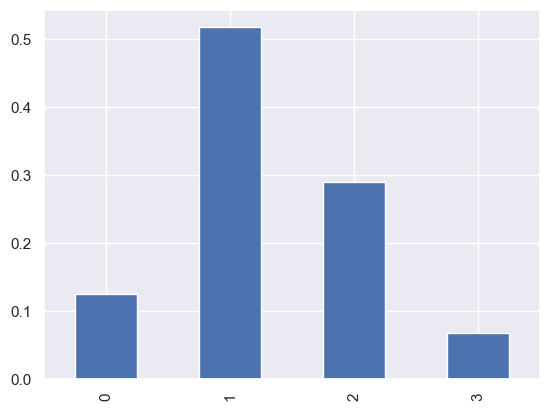

------------------ Level2 ------------------
Number of instances : 35, Number of features : 203
Class distribution


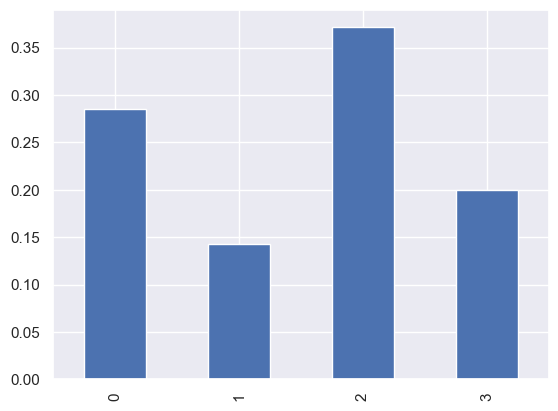

------------------ Level3 ------------------
Number of instances : 408, Number of features : 203
Class distribution


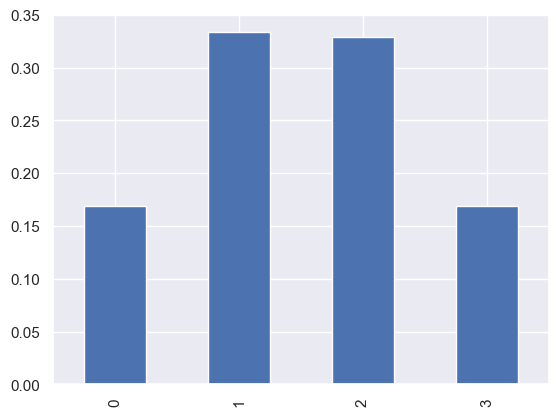

------------------ Level4 ------------------
Number of instances : 338, Number of features : 203
Class distribution


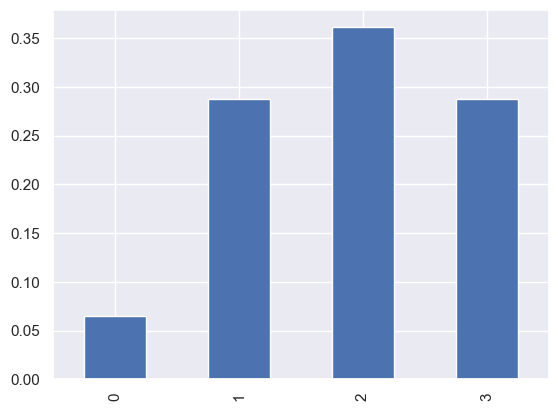

------------------ Level5 ------------------
Number of instances : 164, Number of features : 203
Class distribution


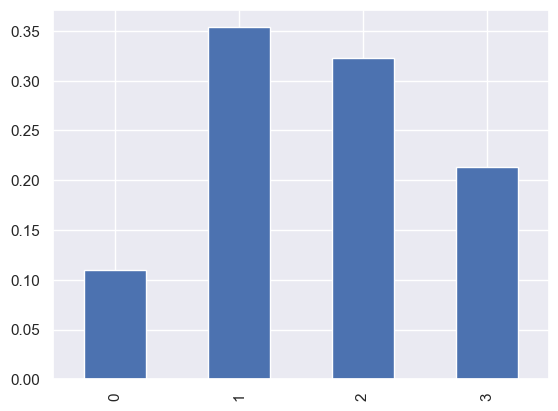

------------------ Level6 ------------------
Number of instances : 67, Number of features : 203
Class distribution


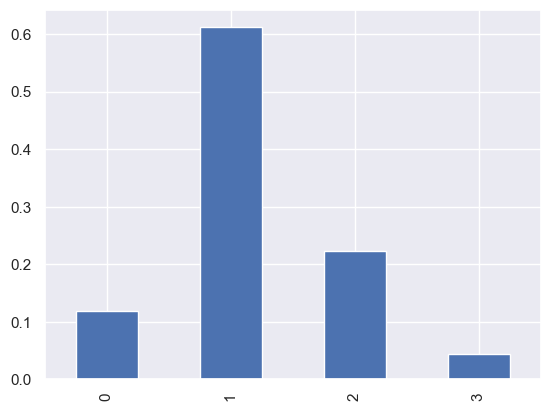

------------------ Level7 ------------------
Number of instances : 19, Number of features : 203
Class distribution


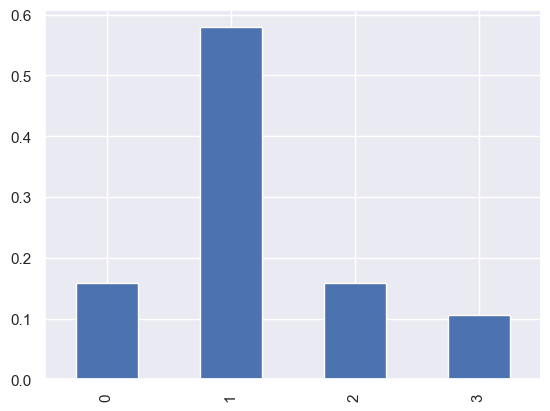

------------------ Level8 ------------------
Number of instances : 6, Number of features : 203
Class distribution


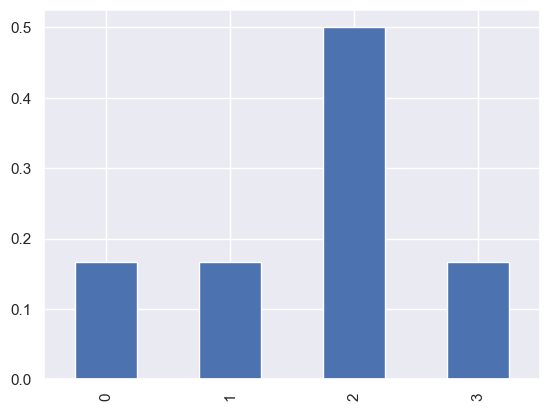

In [14]:
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    print(f"Number of instances : {level_processed_dataframe.shape[0]}, Number of features : {level_processed_dataframe.shape[1]-1}")
    print("Class distribution")
    counts = level_processed_dataframe[LABELS_KEY].value_counts(normalize=True).sort_index()
    counts.plot(kind='bar')
    plt.show()

## Histogram of the features per game level

------------------ Level1 ------------------
Relevant features:  129
Histograms: 


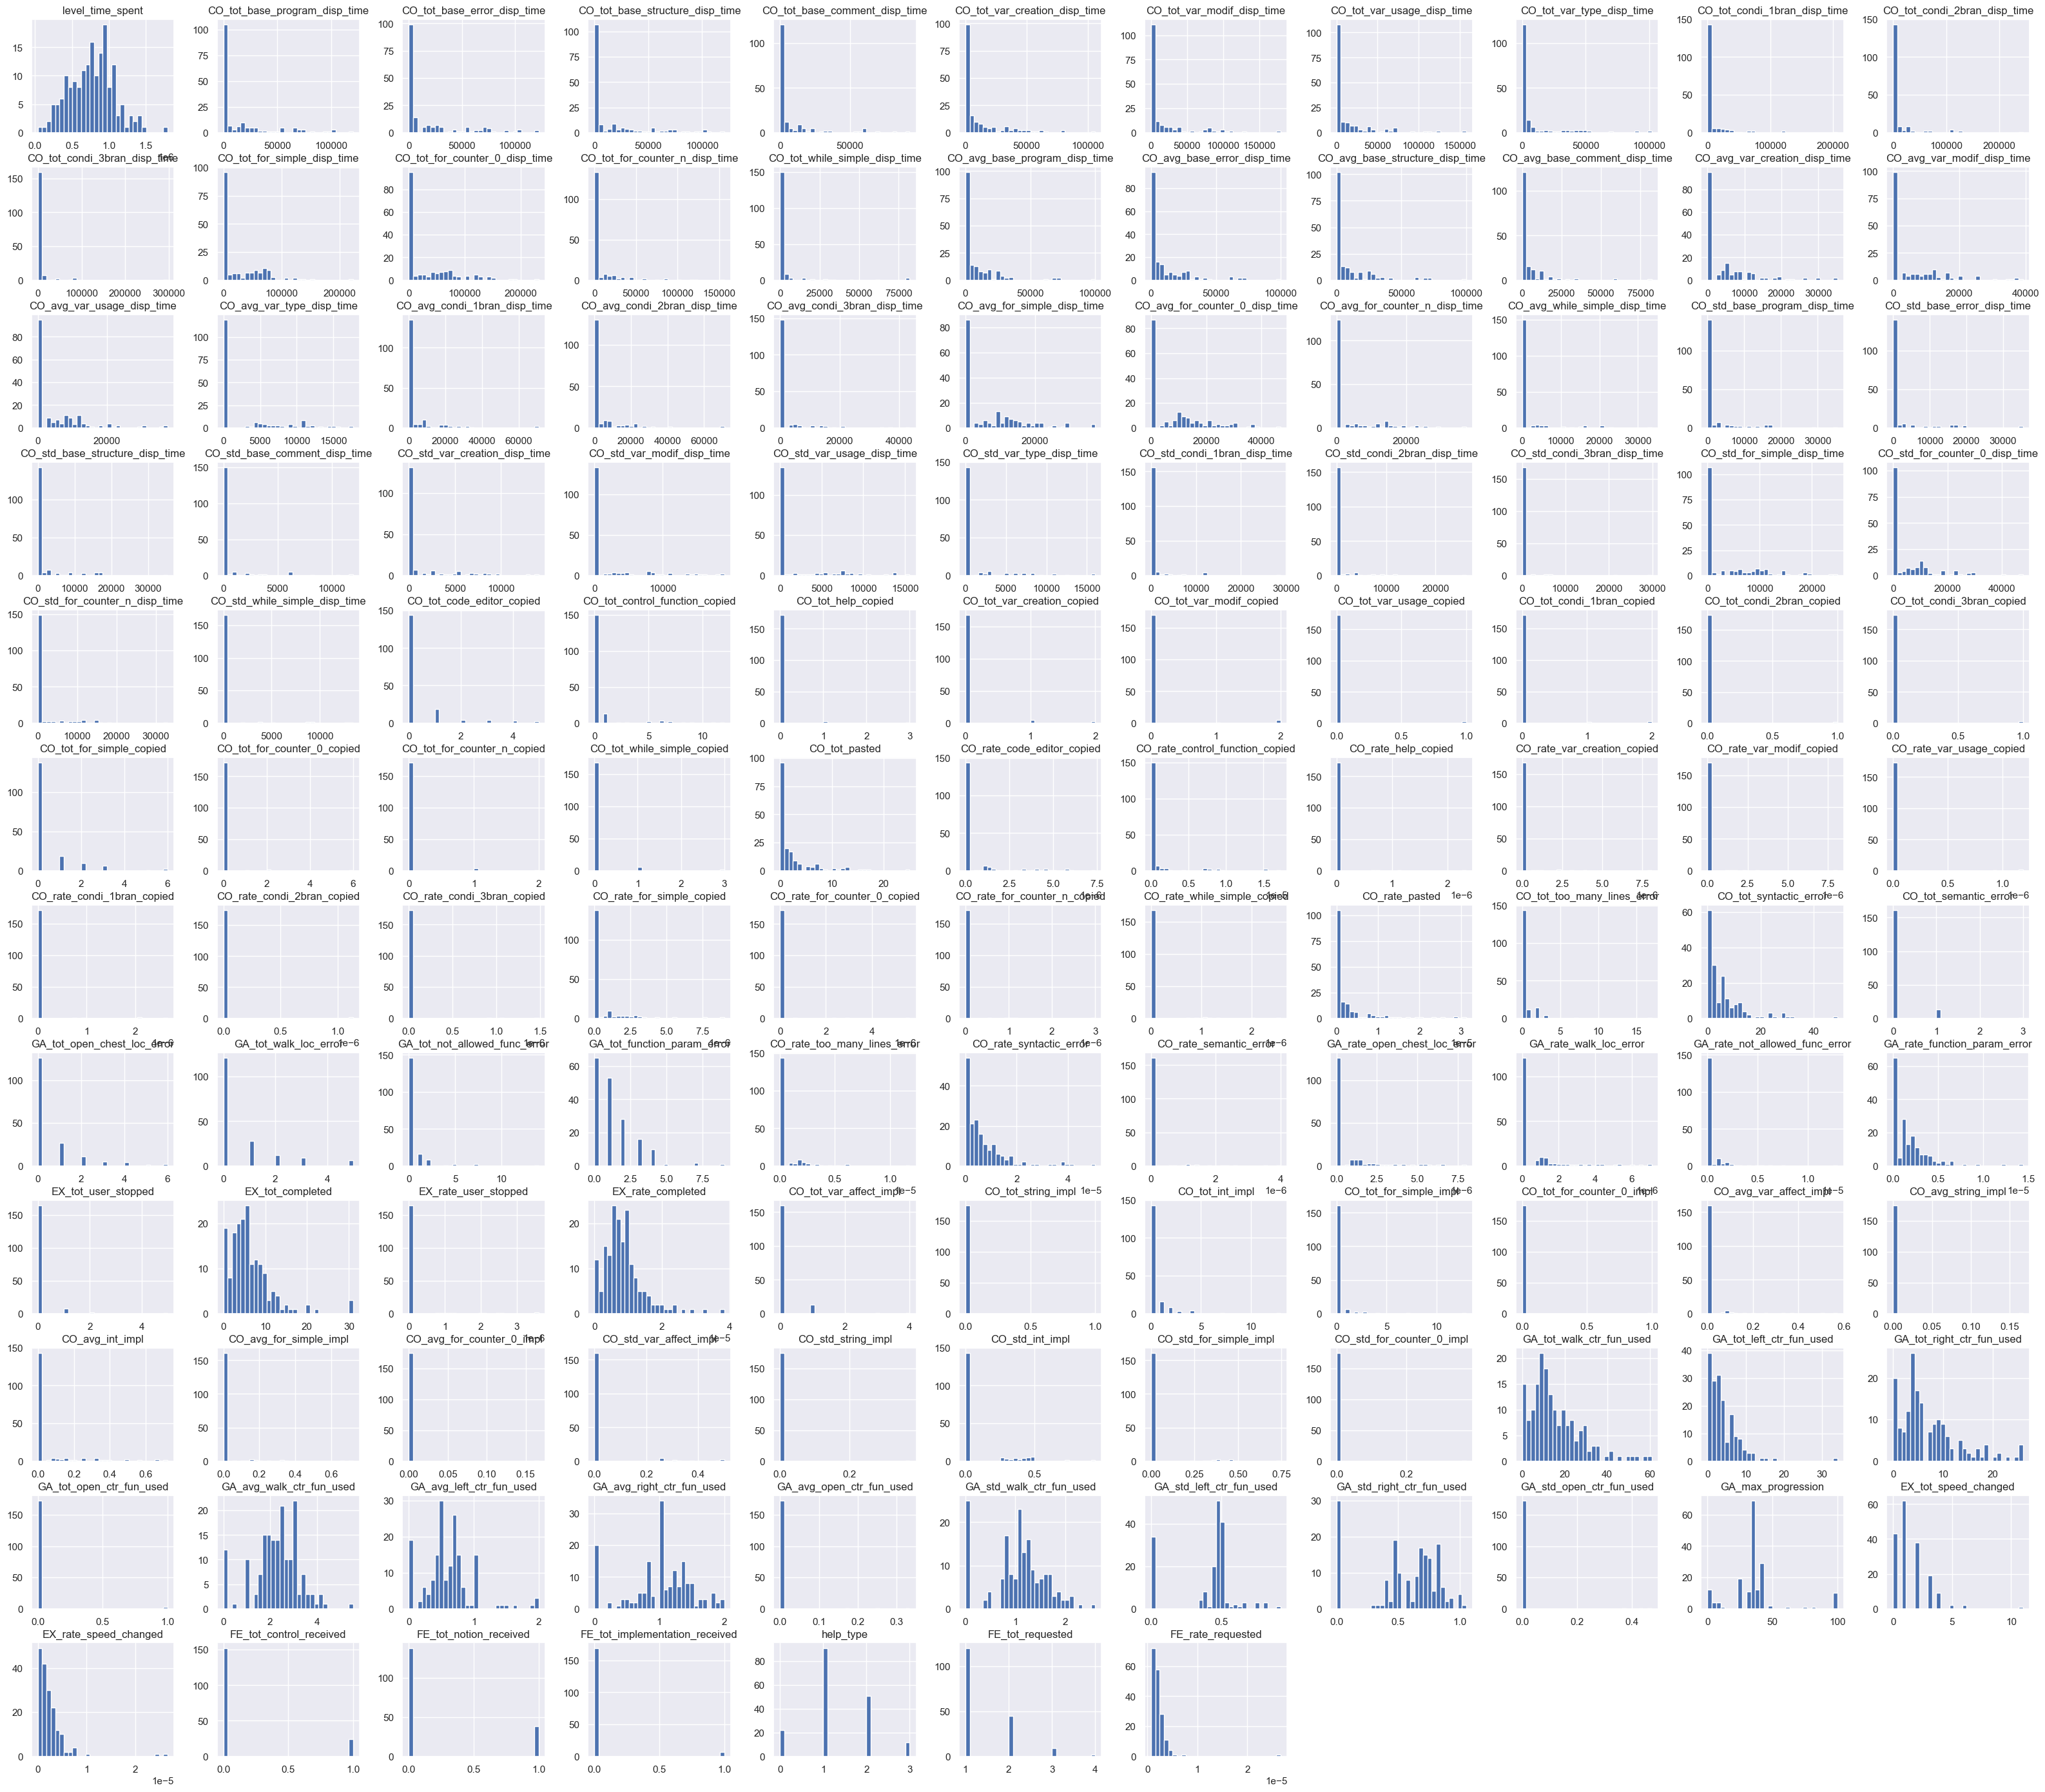

Discarded features:  ['CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_tot_var_type_copied', 'CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'CO_rate_var_type_copied', 'GA_tot_open_chest_key_error', 'GA_tot_read_message_loc_error', 'GA_rate_open_chest_key_error', 'GA_rate_read_message_loc_error', 'GA_tot_spike_touch_lost', 'GA_tot_barrel_explosion_lost', 'GA_tot_pirate_shot_lost', 'GA_rate_spike_touch_lost', 'GA_rate_barrel_explosion_lost', 'GA_rate_pirate_shot_lost', 'CO_tot_boolean_impl', 'CO_tot_float_impl', 'CO_tot_comparison_impl', 'CO_tot_if_branch_impl', 'CO_tot_elif_branch_impl', 'CO_tot_else_branch_impl', 'CO_tot_for_counter_n_impl', 'CO_tot_while_impl', 'CO_avg_boolean_impl', 'CO_avg_float_impl', 'CO_avg_comparison_impl', 'CO_avg_if_branch_impl', 'CO_avg_elif_branch_impl', 'CO_avg_else_branch_impl', 'CO_avg_for_counter_

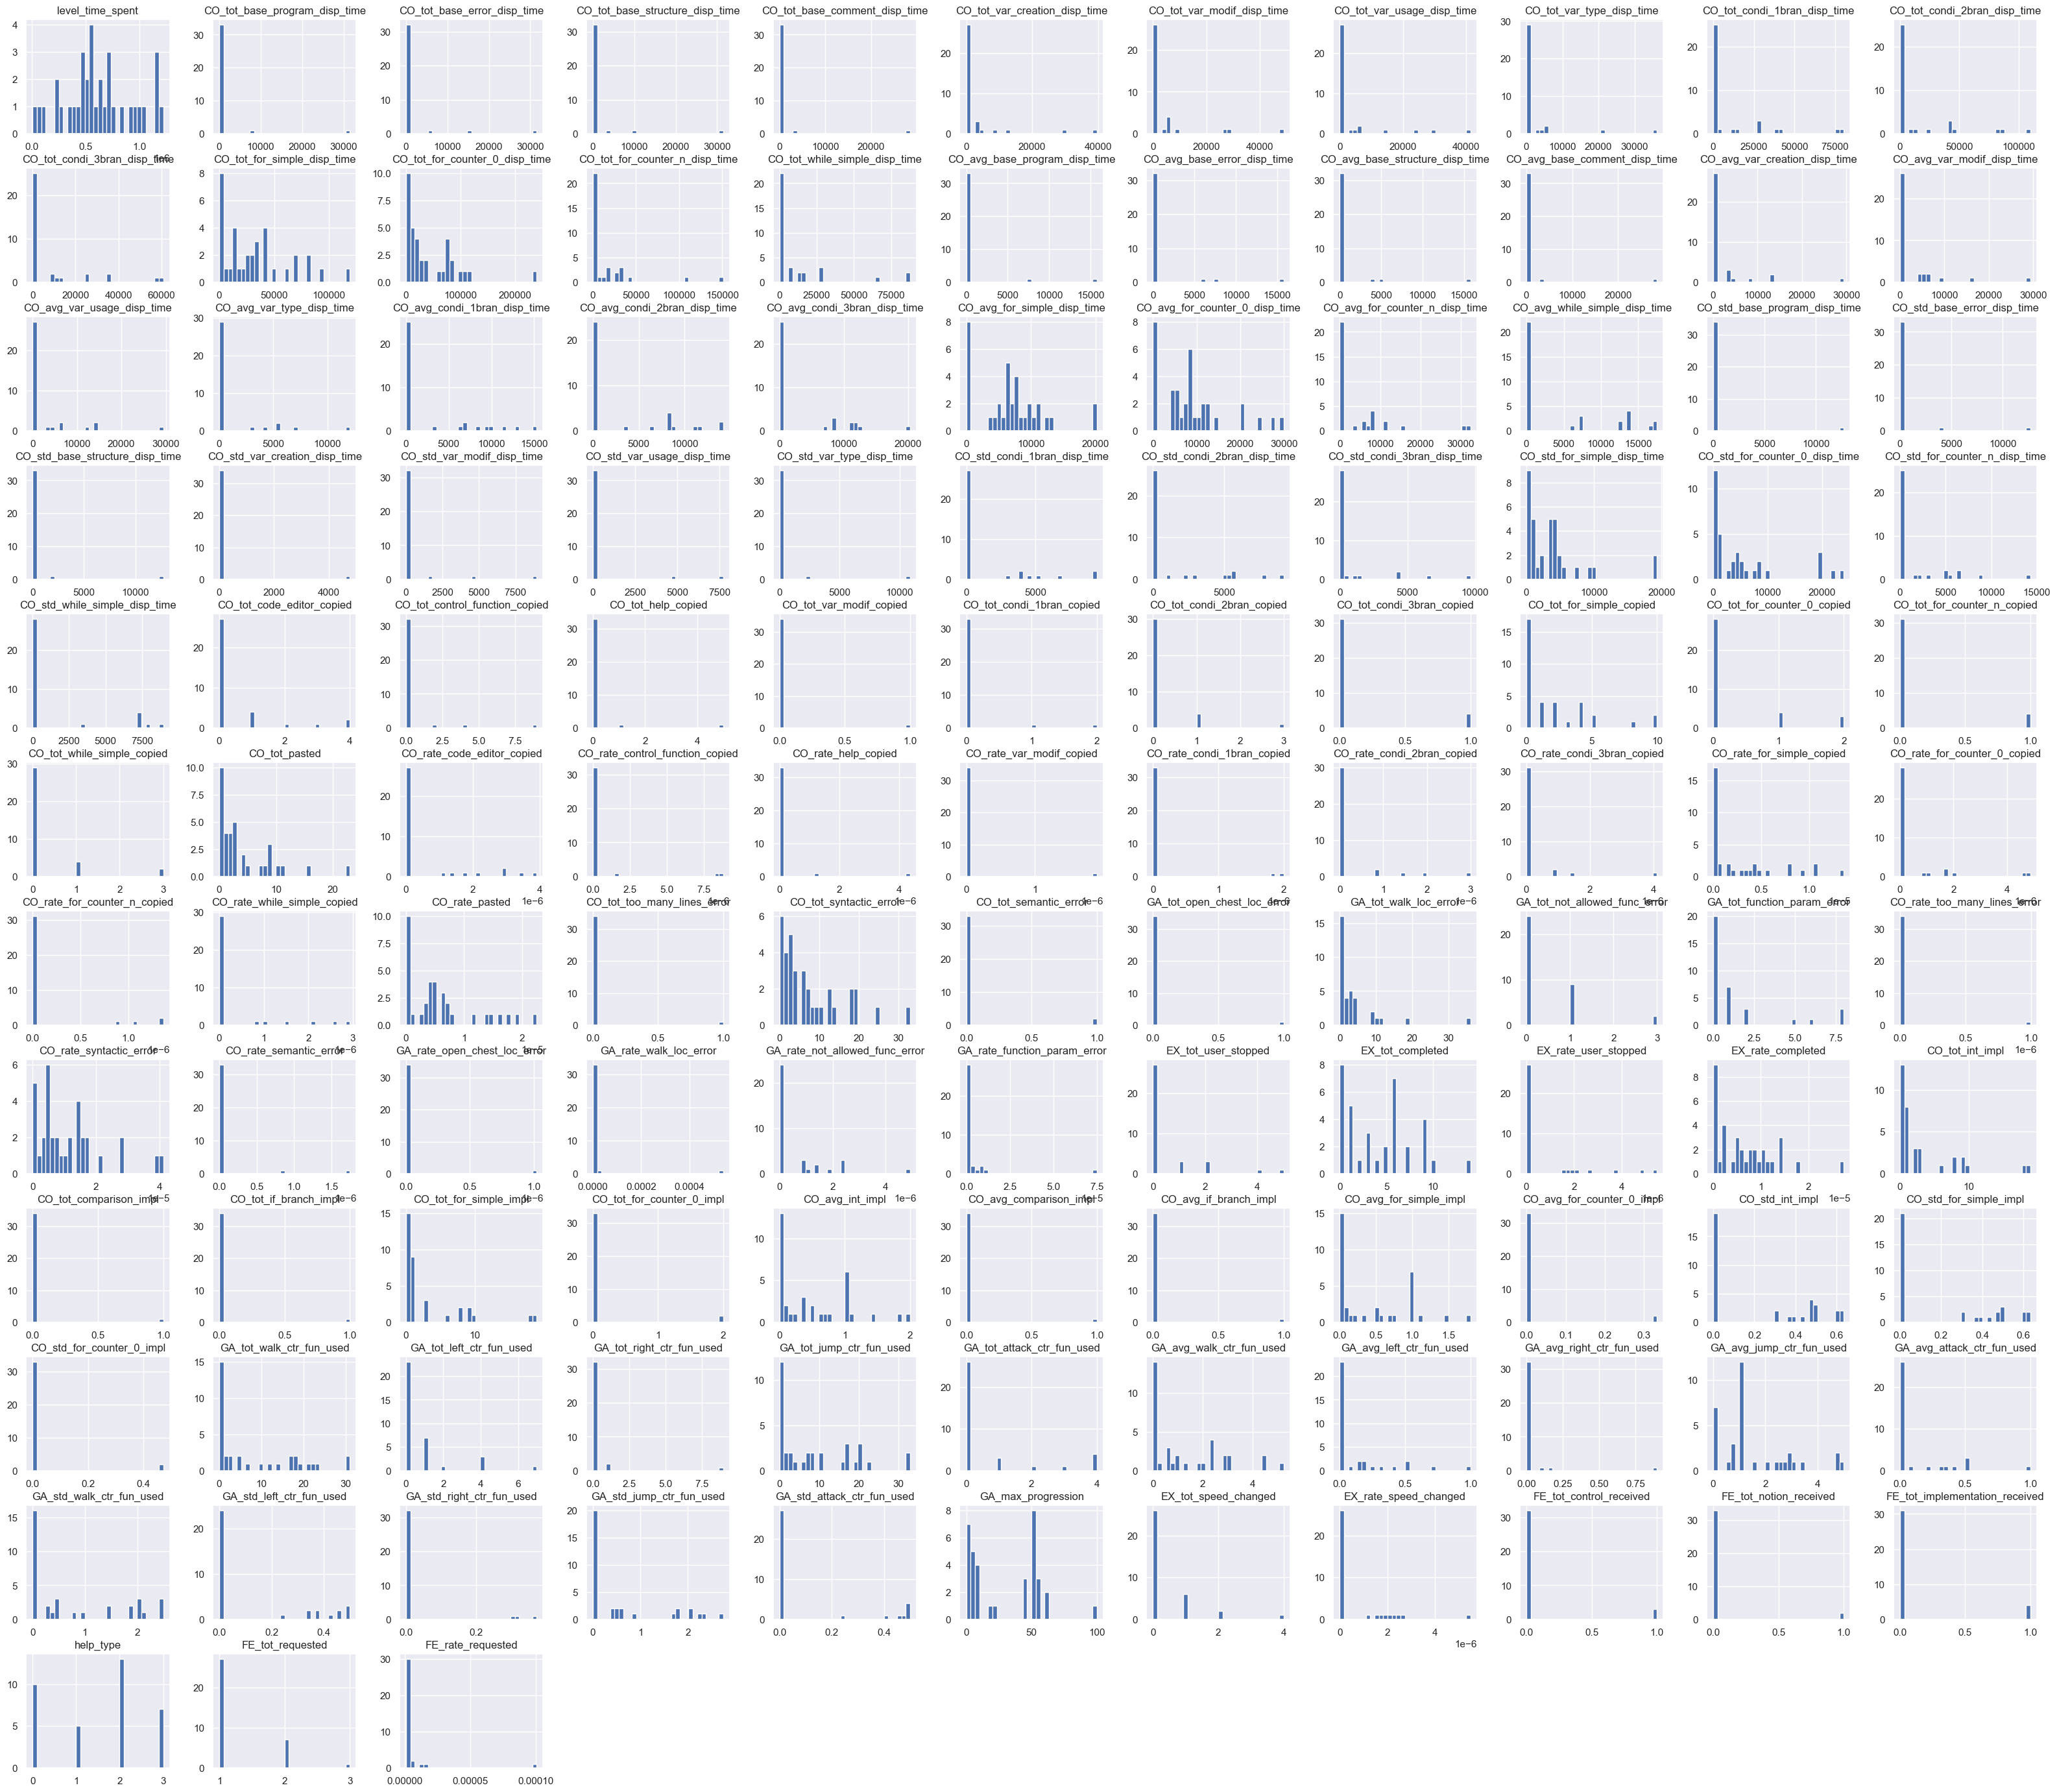

Discarded features:  ['CO_std_base_comment_disp_time', 'CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_tot_var_creation_copied', 'CO_tot_var_usage_copied', 'CO_tot_var_type_copied', 'CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'CO_rate_var_creation_copied', 'CO_rate_var_usage_copied', 'CO_rate_var_type_copied', 'GA_tot_open_chest_key_error', 'GA_tot_read_message_loc_error', 'GA_rate_open_chest_key_error', 'GA_rate_read_message_loc_error', 'GA_tot_spike_touch_lost', 'GA_tot_barrel_explosion_lost', 'GA_tot_pirate_shot_lost', 'GA_rate_spike_touch_lost', 'GA_rate_barrel_explosion_lost', 'GA_rate_pirate_shot_lost', 'CO_tot_var_affect_impl', 'CO_tot_boolean_impl', 'CO_tot_string_impl', 'CO_tot_float_impl', 'CO_tot_elif_branch_impl', 'CO_tot_else_branch_impl', 'CO_tot_for_counter_n_impl', 'CO_tot_while_impl', 'CO_avg_var_affect_impl

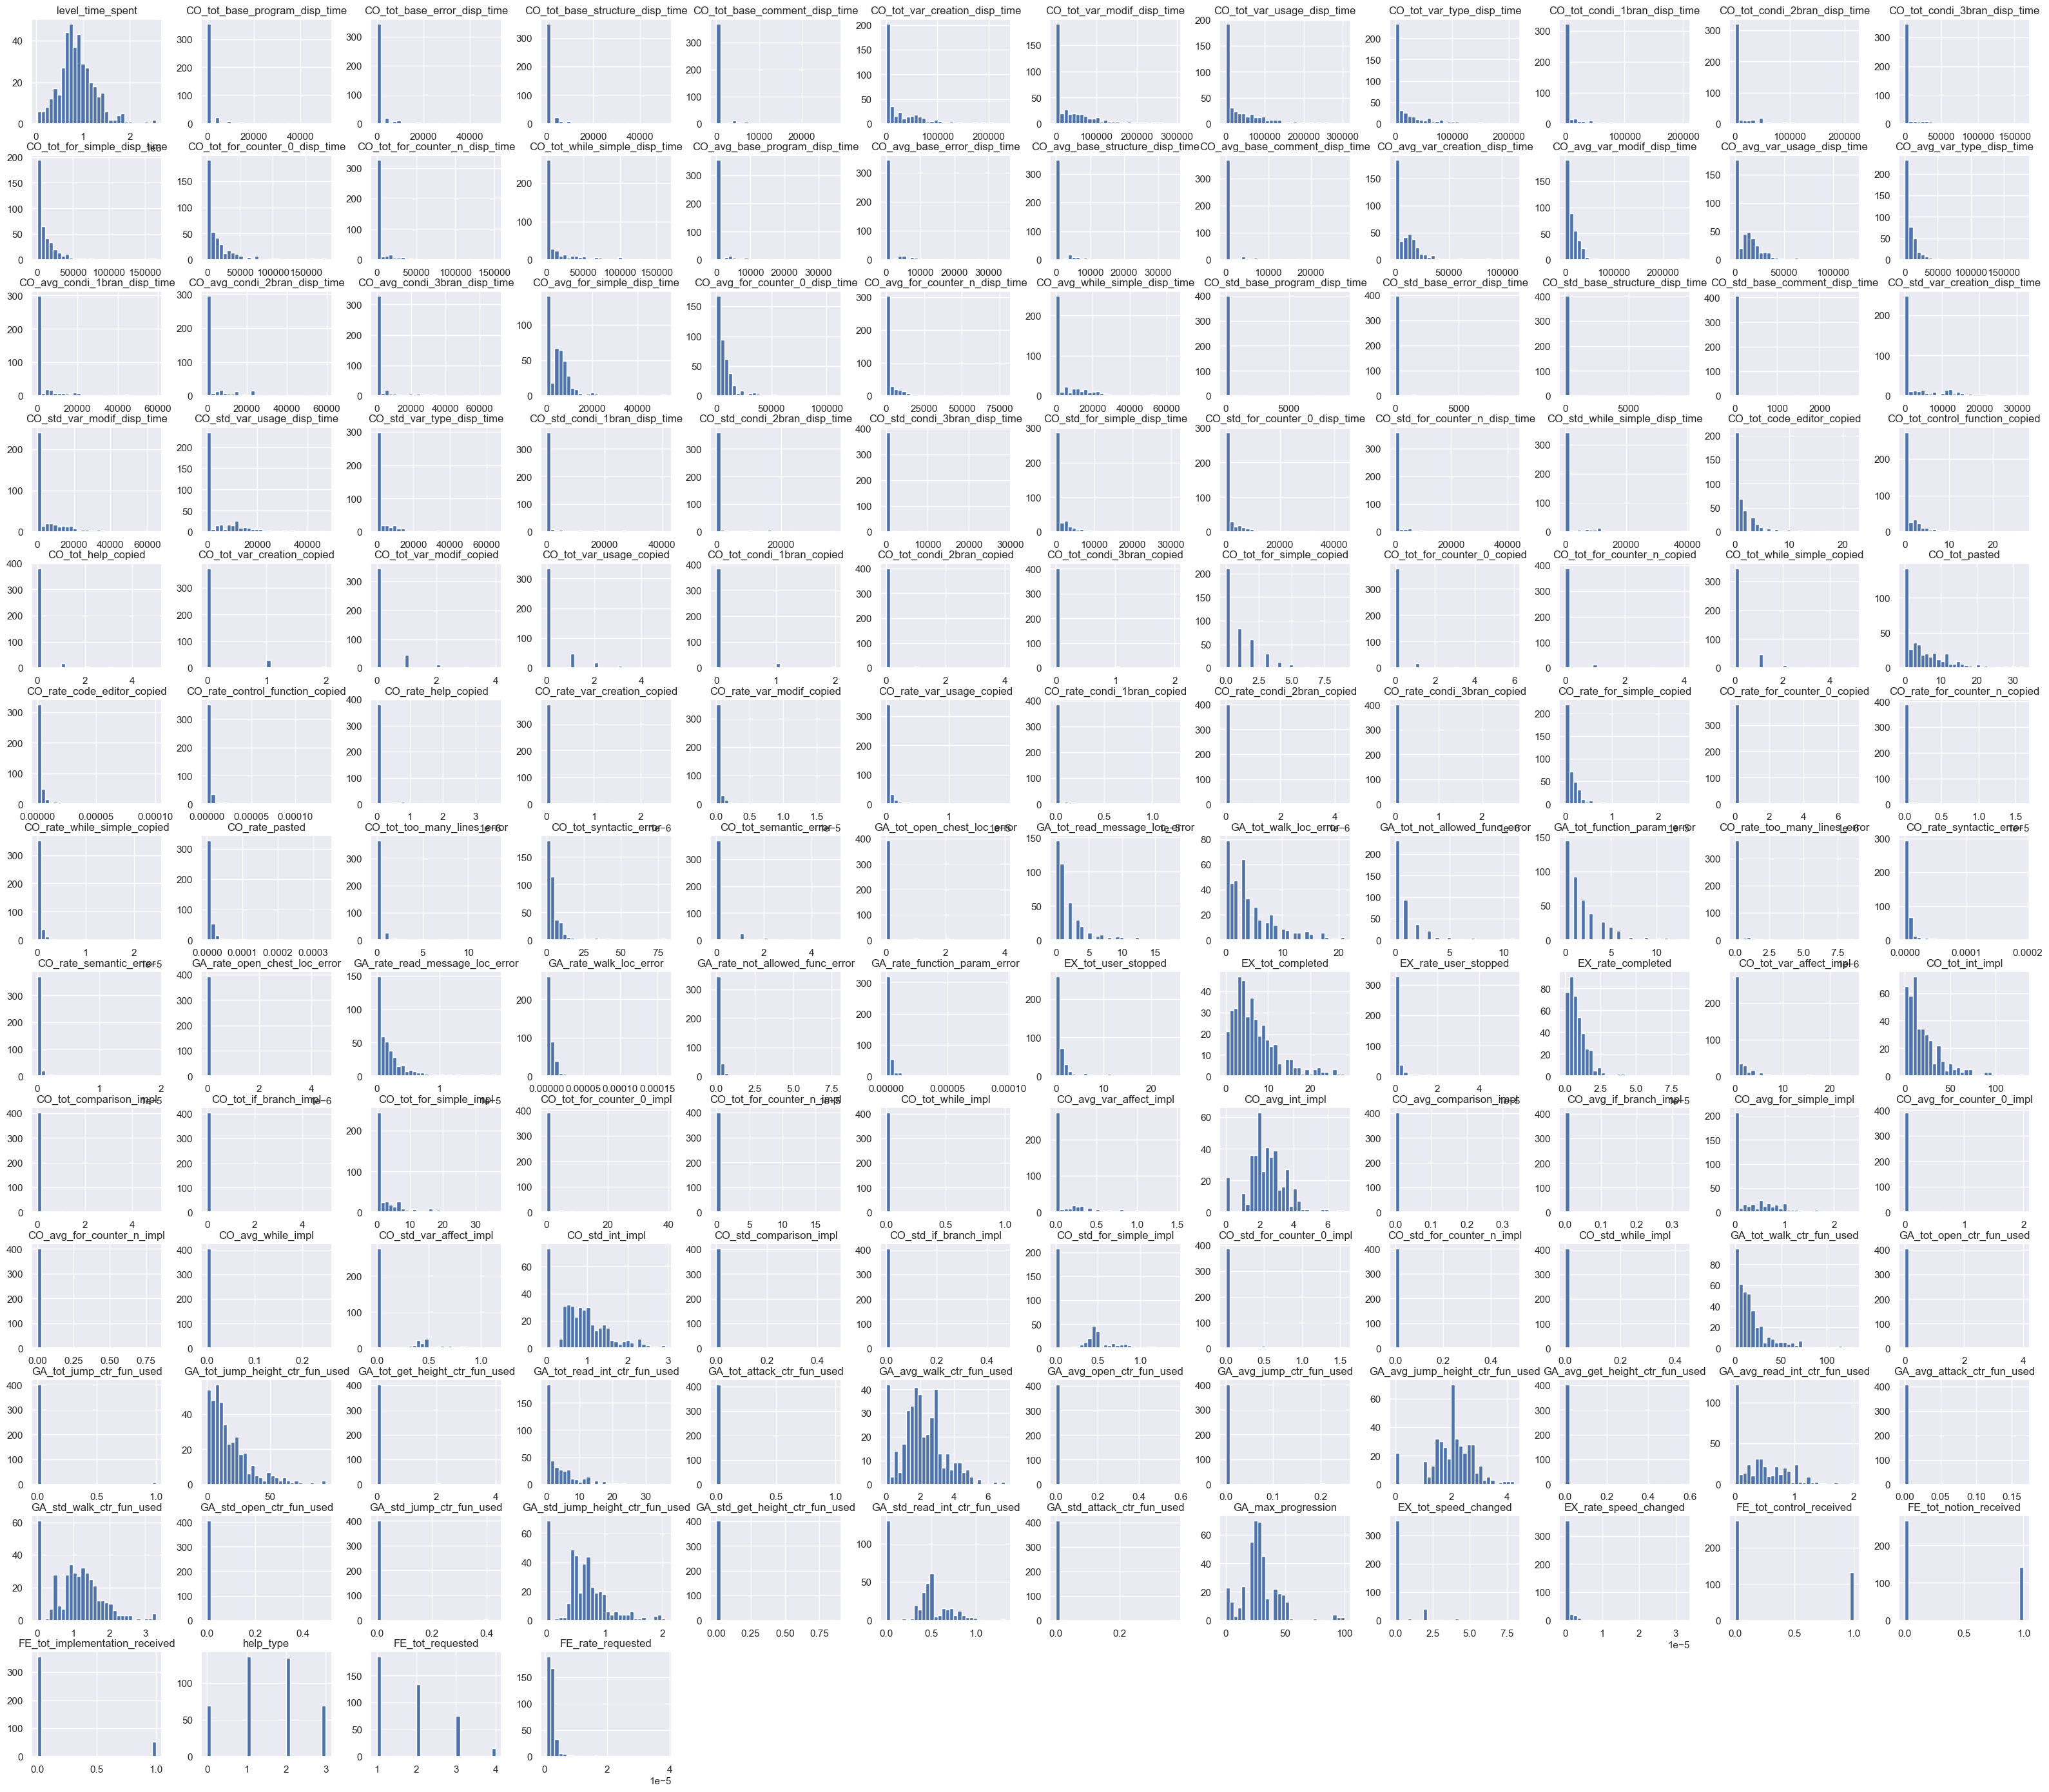

Discarded features:  ['CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_tot_var_type_copied', 'CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'CO_rate_var_type_copied', 'GA_tot_open_chest_key_error', 'GA_rate_open_chest_key_error', 'GA_tot_spike_touch_lost', 'GA_tot_barrel_explosion_lost', 'GA_tot_pirate_shot_lost', 'GA_rate_spike_touch_lost', 'GA_rate_barrel_explosion_lost', 'GA_rate_pirate_shot_lost', 'CO_tot_boolean_impl', 'CO_tot_string_impl', 'CO_tot_float_impl', 'CO_tot_elif_branch_impl', 'CO_tot_else_branch_impl', 'CO_avg_boolean_impl', 'CO_avg_string_impl', 'CO_avg_float_impl', 'CO_avg_elif_branch_impl', 'CO_avg_else_branch_impl', 'CO_std_boolean_impl', 'CO_std_string_impl', 'CO_std_float_impl', 'CO_std_elif_branch_impl', 'CO_std_else_branch_impl', 'GA_tot_left_ctr_fun_used', 'GA_tot_right_ctr_fun_used', 'GA_tot_jump_high_

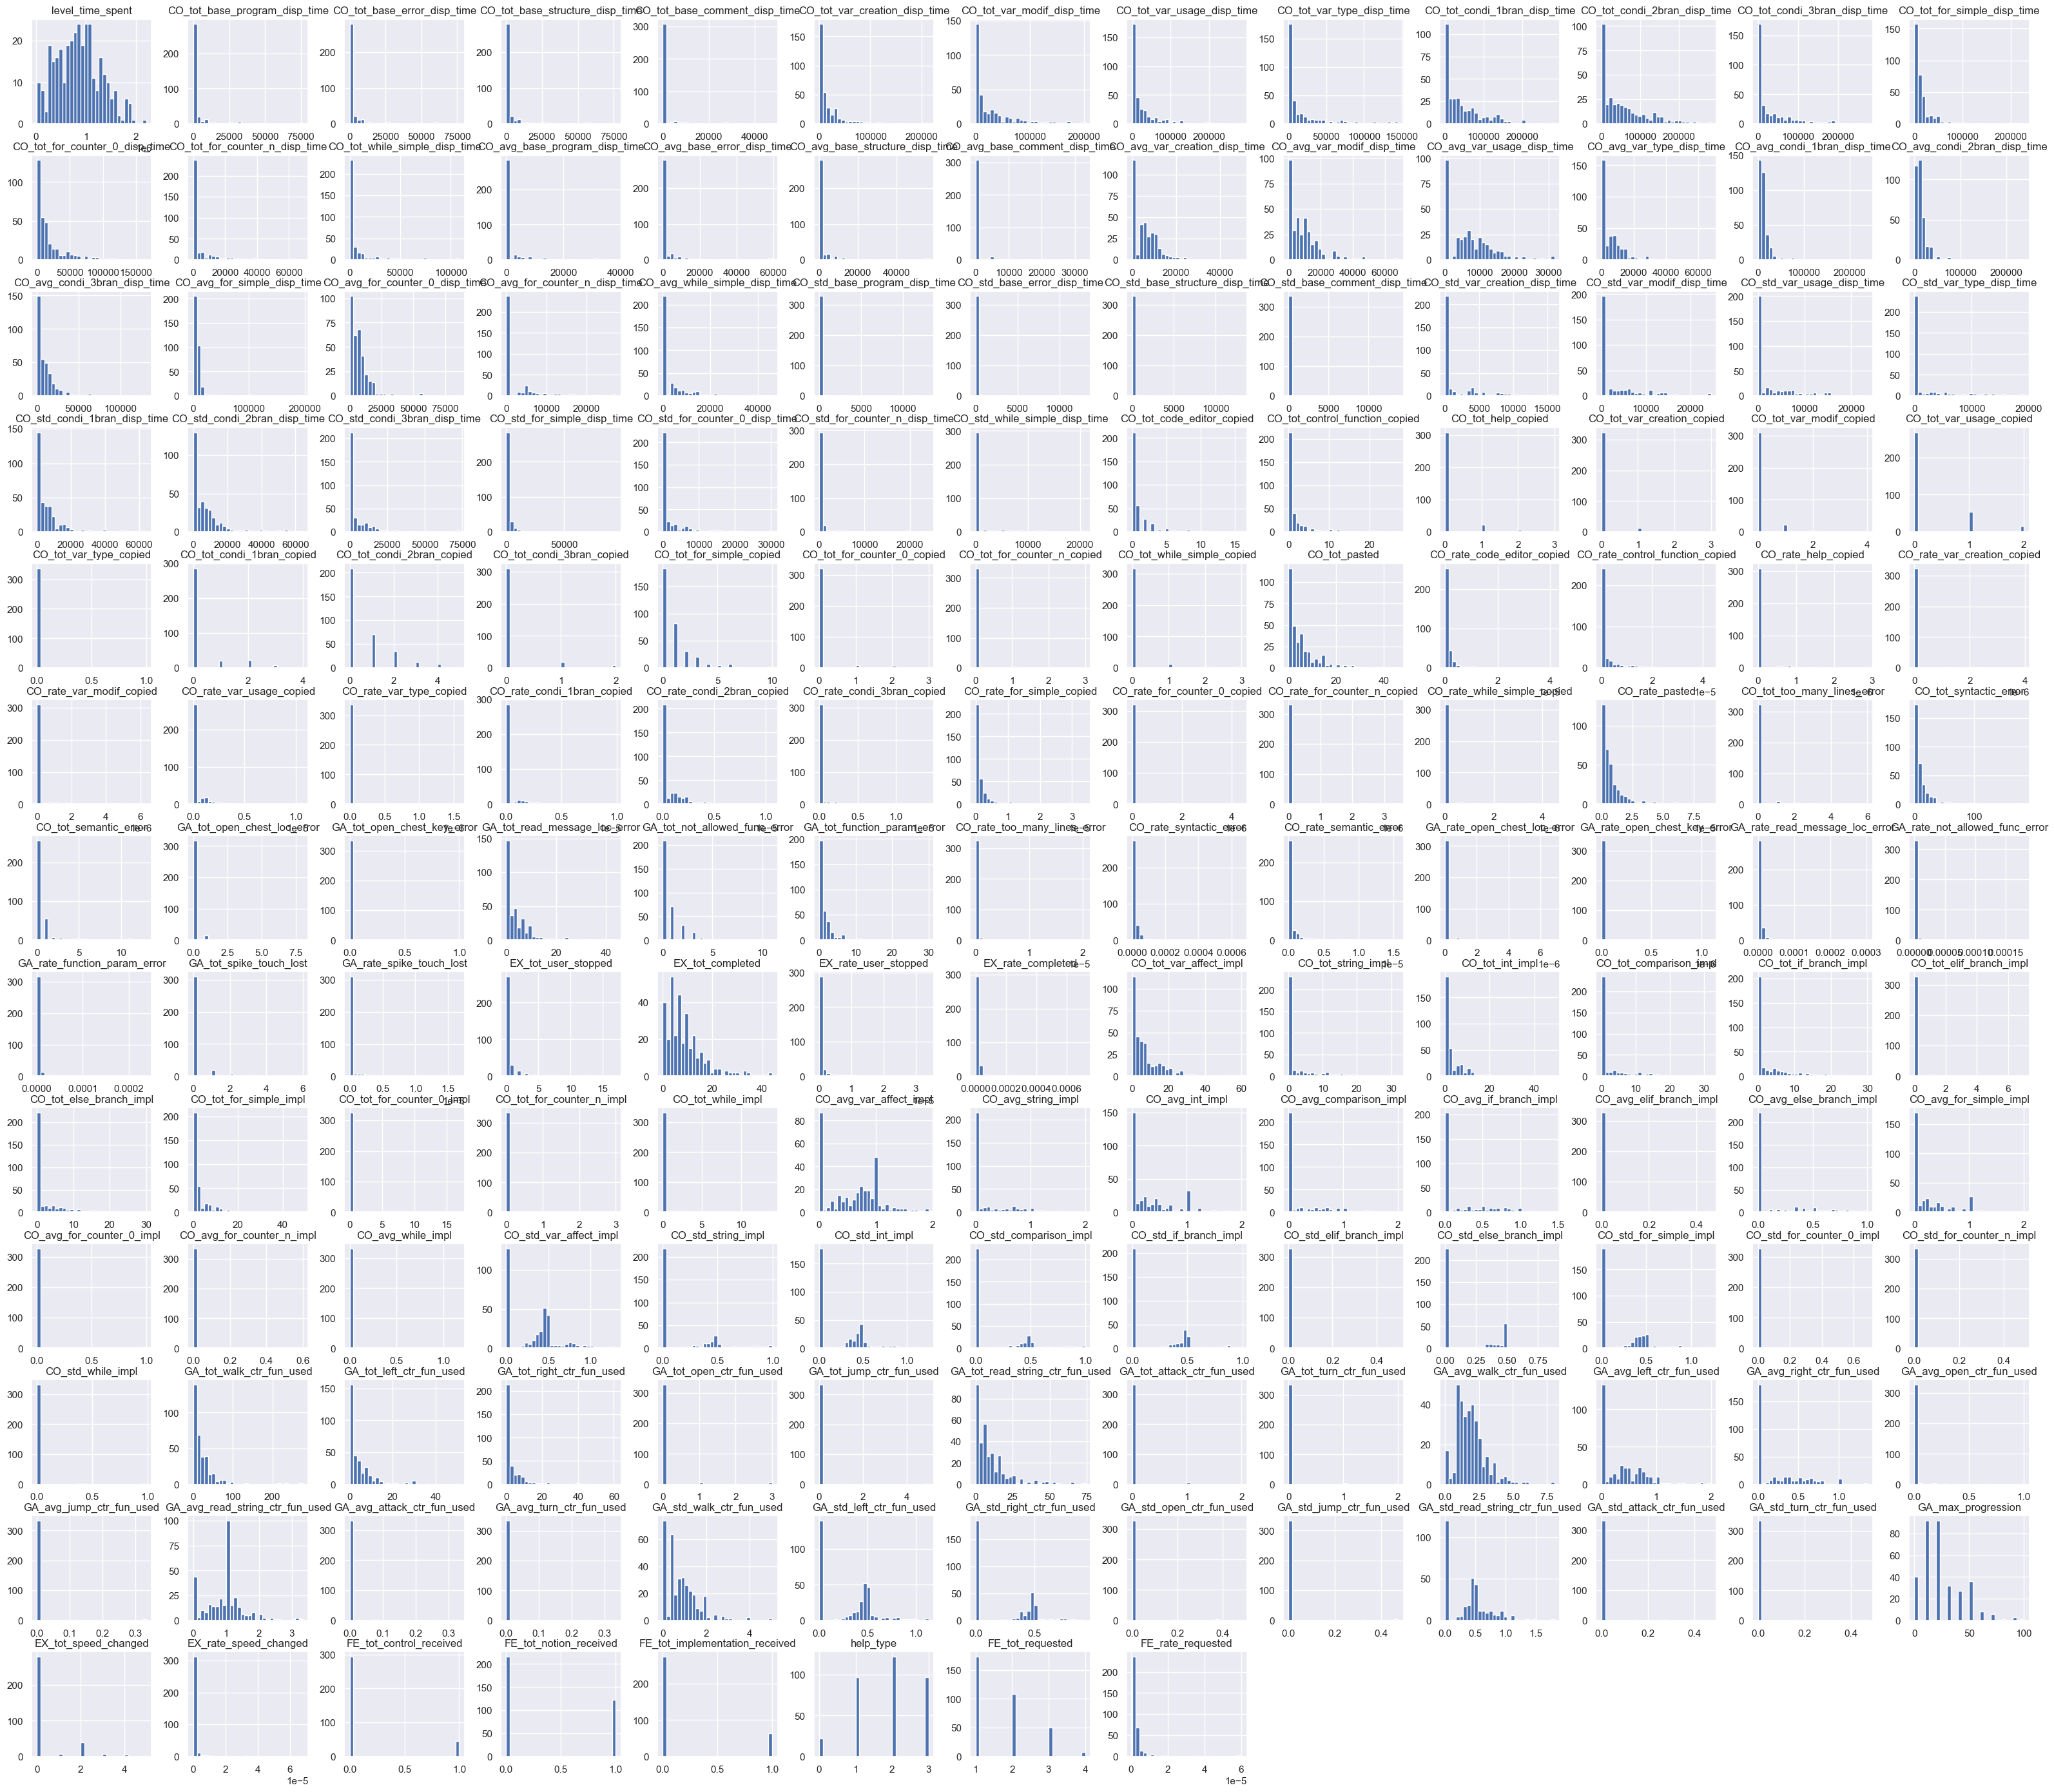

Discarded features:  ['CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'GA_tot_walk_loc_error', 'GA_rate_walk_loc_error', 'GA_tot_barrel_explosion_lost', 'GA_tot_pirate_shot_lost', 'GA_rate_barrel_explosion_lost', 'GA_rate_pirate_shot_lost', 'CO_tot_boolean_impl', 'CO_tot_float_impl', 'CO_avg_boolean_impl', 'CO_avg_float_impl', 'CO_std_boolean_impl', 'CO_std_float_impl', 'GA_tot_jump_height_ctr_fun_used', 'GA_tot_jump_high_ctr_fun_used', 'GA_tot_get_height_ctr_fun_used', 'GA_tot_read_int_ctr_fun_used', 'GA_tot_detect_obstacle_ctr_fun_used', 'GA_tot_shoot_ctr_fun_used', 'GA_avg_jump_height_ctr_fun_used', 'GA_avg_jump_high_ctr_fun_used', 'GA_avg_get_height_ctr_fun_used', 'GA_avg_read_int_ctr_fun_used', 'GA_avg_detect_obstacle_ctr_fun_used', 'GA_avg_shoot_ctr_fun_used', 'GA_std_jump_height

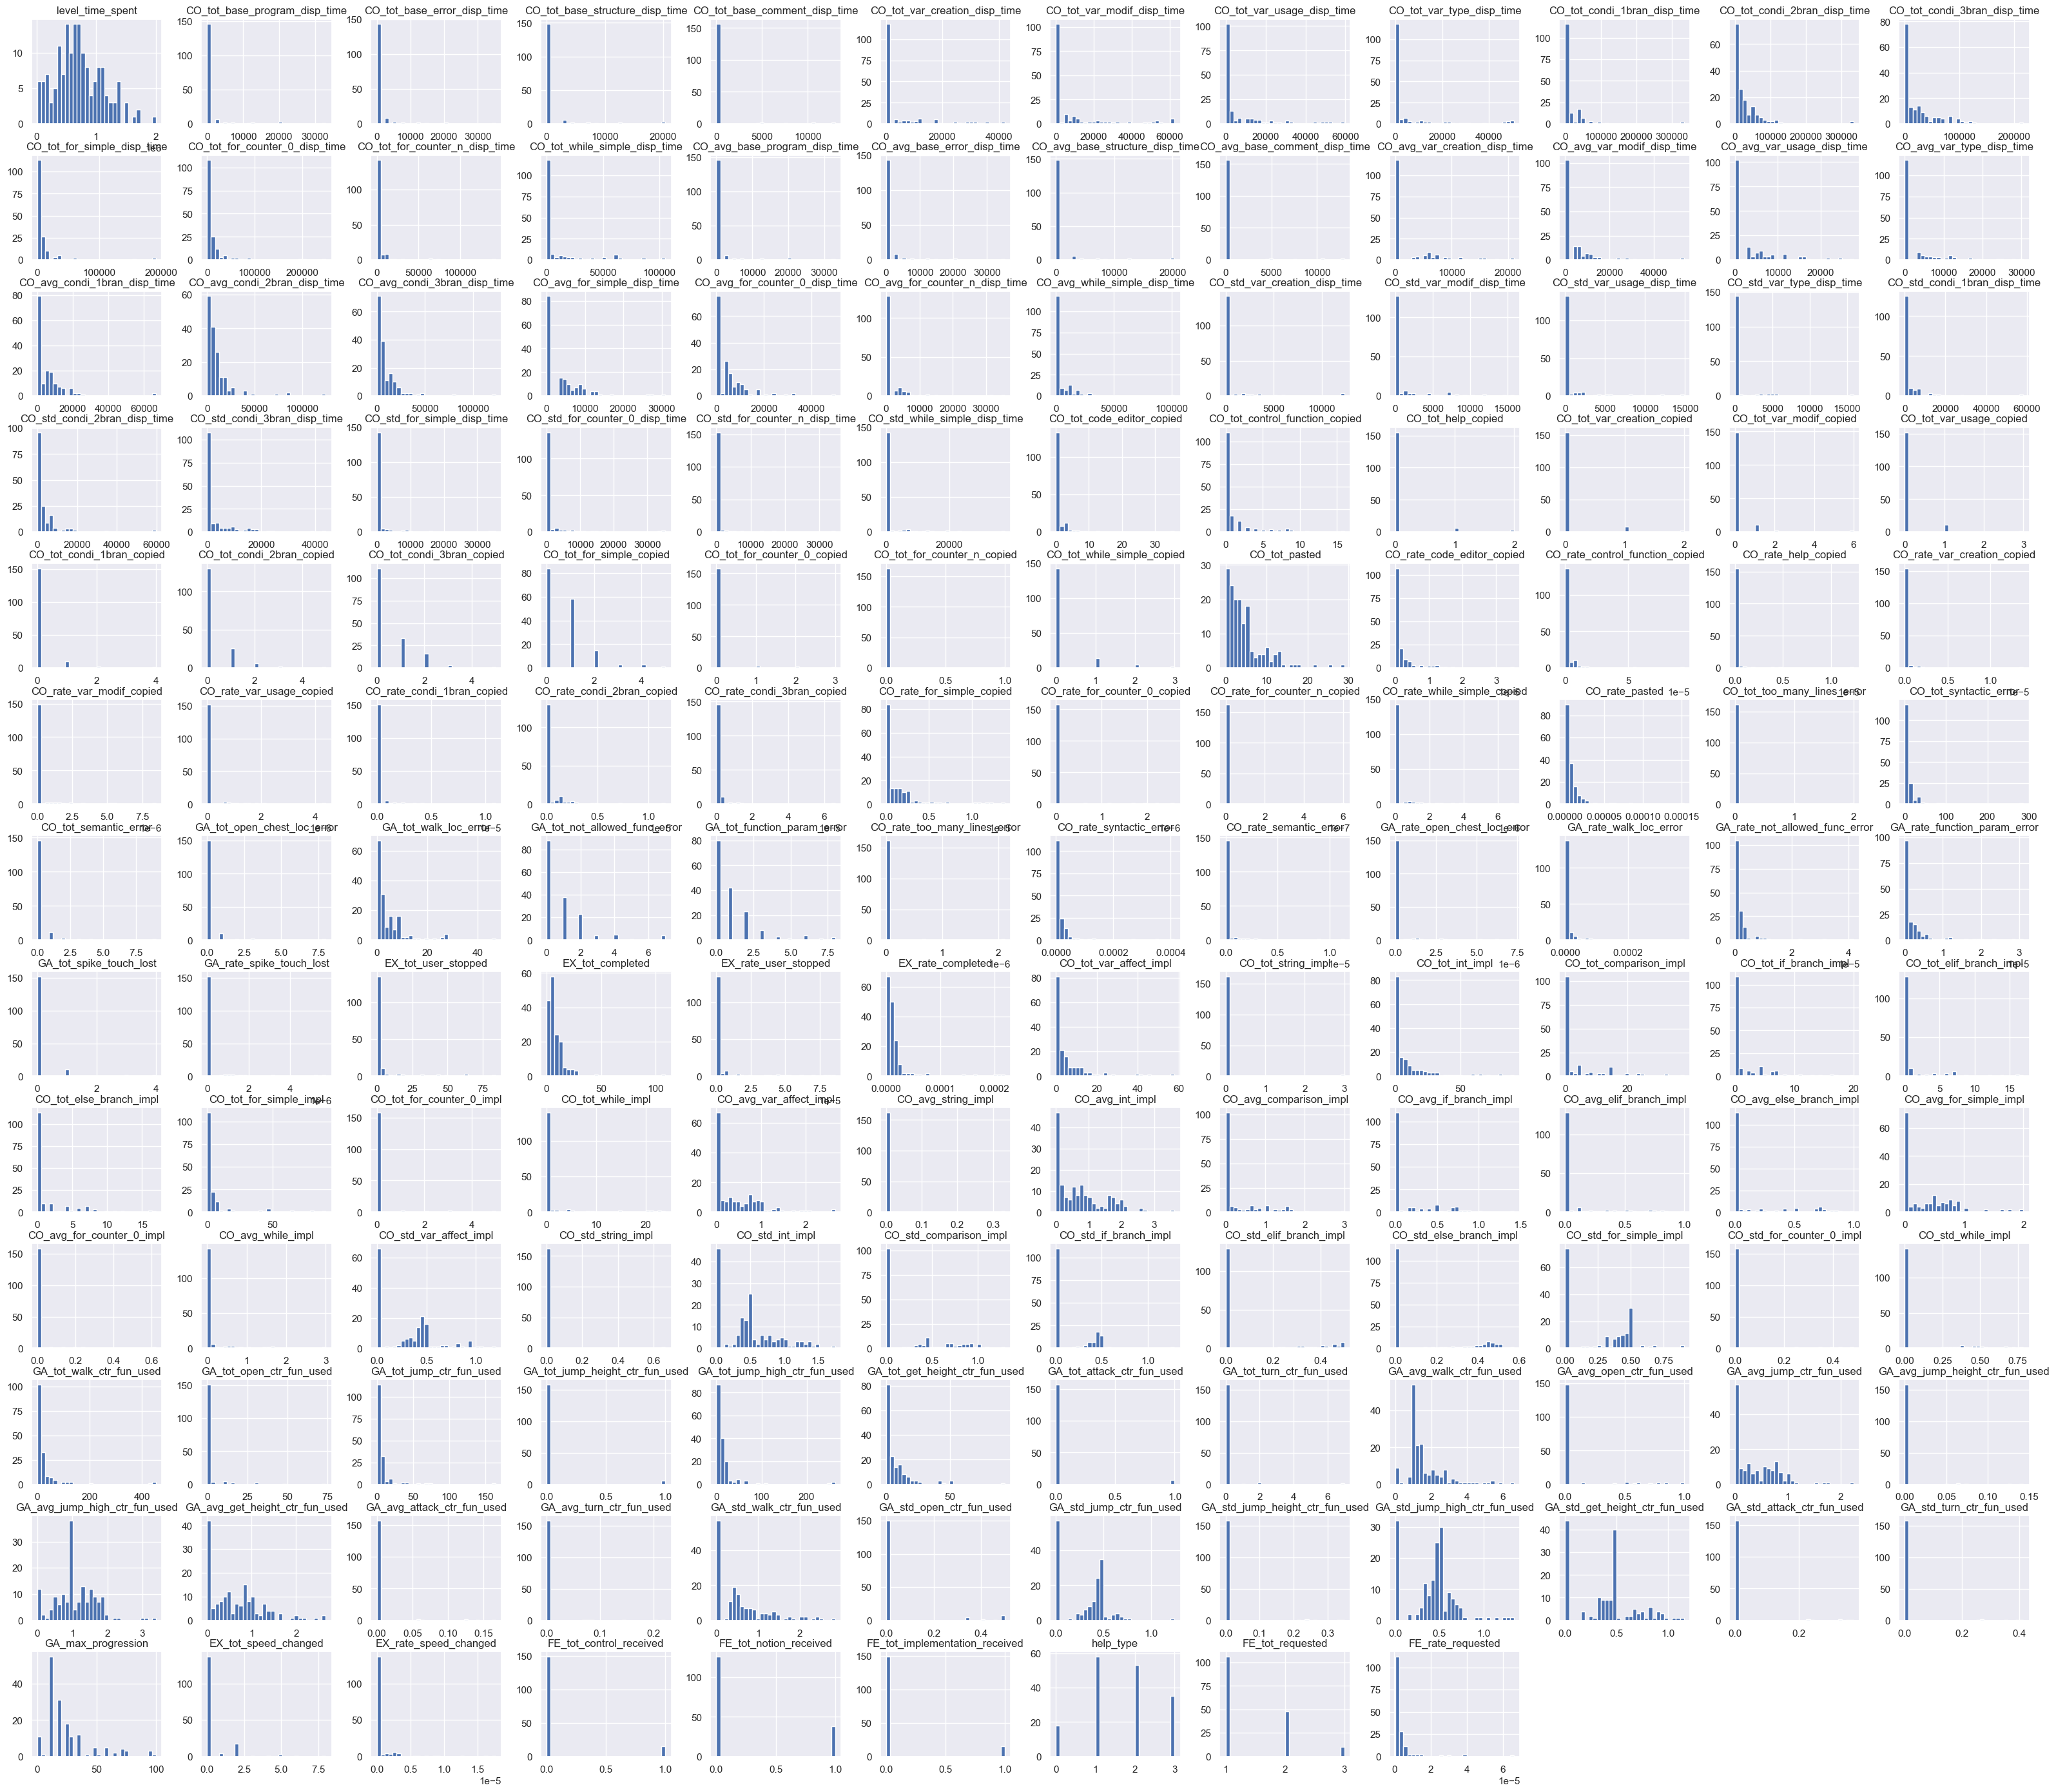

Discarded features:  ['CO_std_base_program_disp_time', 'CO_std_base_error_disp_time', 'CO_std_base_structure_disp_time', 'CO_std_base_comment_disp_time', 'CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_tot_var_type_copied', 'CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'CO_rate_var_type_copied', 'GA_tot_open_chest_key_error', 'GA_tot_read_message_loc_error', 'GA_rate_open_chest_key_error', 'GA_rate_read_message_loc_error', 'GA_tot_barrel_explosion_lost', 'GA_tot_pirate_shot_lost', 'GA_rate_barrel_explosion_lost', 'GA_rate_pirate_shot_lost', 'CO_tot_boolean_impl', 'CO_tot_float_impl', 'CO_tot_for_counter_n_impl', 'CO_avg_boolean_impl', 'CO_avg_float_impl', 'CO_avg_for_counter_n_impl', 'CO_std_boolean_impl', 'CO_std_float_impl', 'CO_std_for_counter_n_impl', 'GA_tot_left_ctr_fun_used', 'GA_tot_right_ctr_fun_used', 'GA_tot_read_st

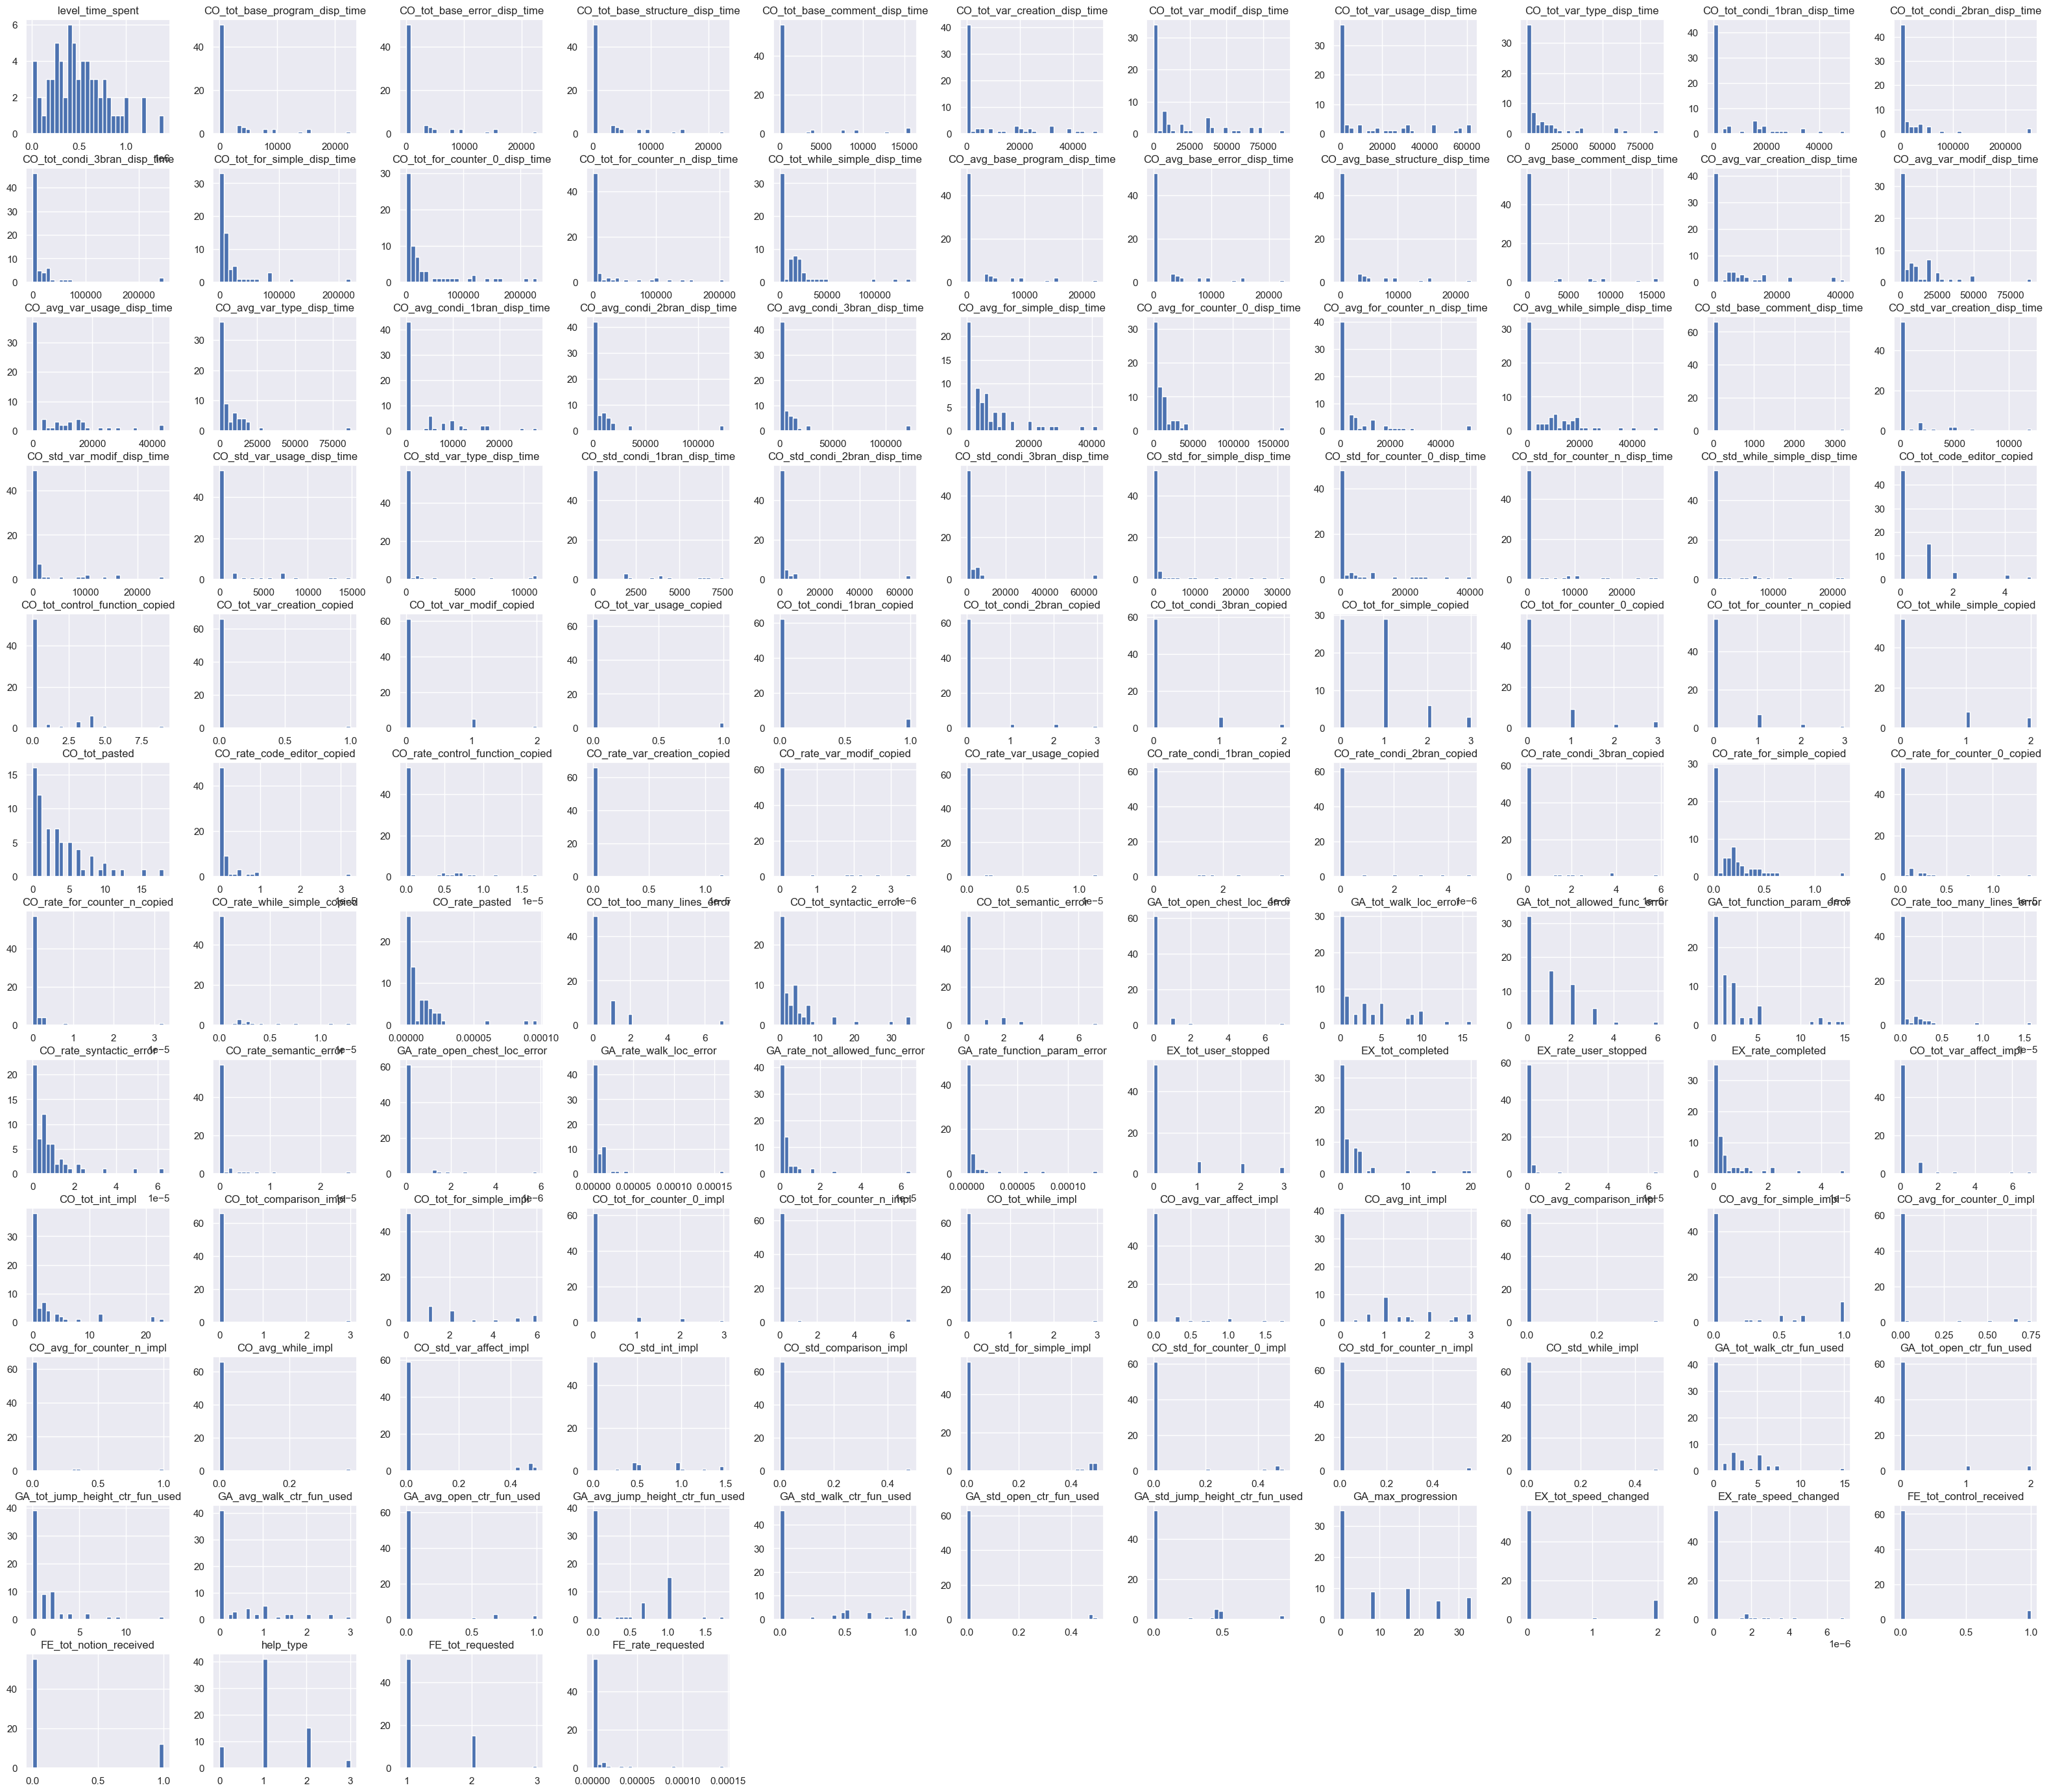

Discarded features:  ['CO_std_base_program_disp_time', 'CO_std_base_error_disp_time', 'CO_std_base_structure_disp_time', 'CO_tot_help_copied', 'CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_tot_var_type_copied', 'CO_rate_help_copied', 'CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'CO_rate_var_type_copied', 'GA_tot_open_chest_key_error', 'GA_tot_read_message_loc_error', 'GA_rate_open_chest_key_error', 'GA_rate_read_message_loc_error', 'GA_tot_spike_touch_lost', 'GA_tot_barrel_explosion_lost', 'GA_tot_pirate_shot_lost', 'GA_rate_spike_touch_lost', 'GA_rate_barrel_explosion_lost', 'GA_rate_pirate_shot_lost', 'CO_tot_boolean_impl', 'CO_tot_string_impl', 'CO_tot_float_impl', 'CO_tot_if_branch_impl', 'CO_tot_elif_branch_impl', 'CO_tot_else_branch_impl', 'CO_avg_boolean_impl', 'CO_avg_string_impl', 'CO_avg_float_impl', 'CO_avg_if_br

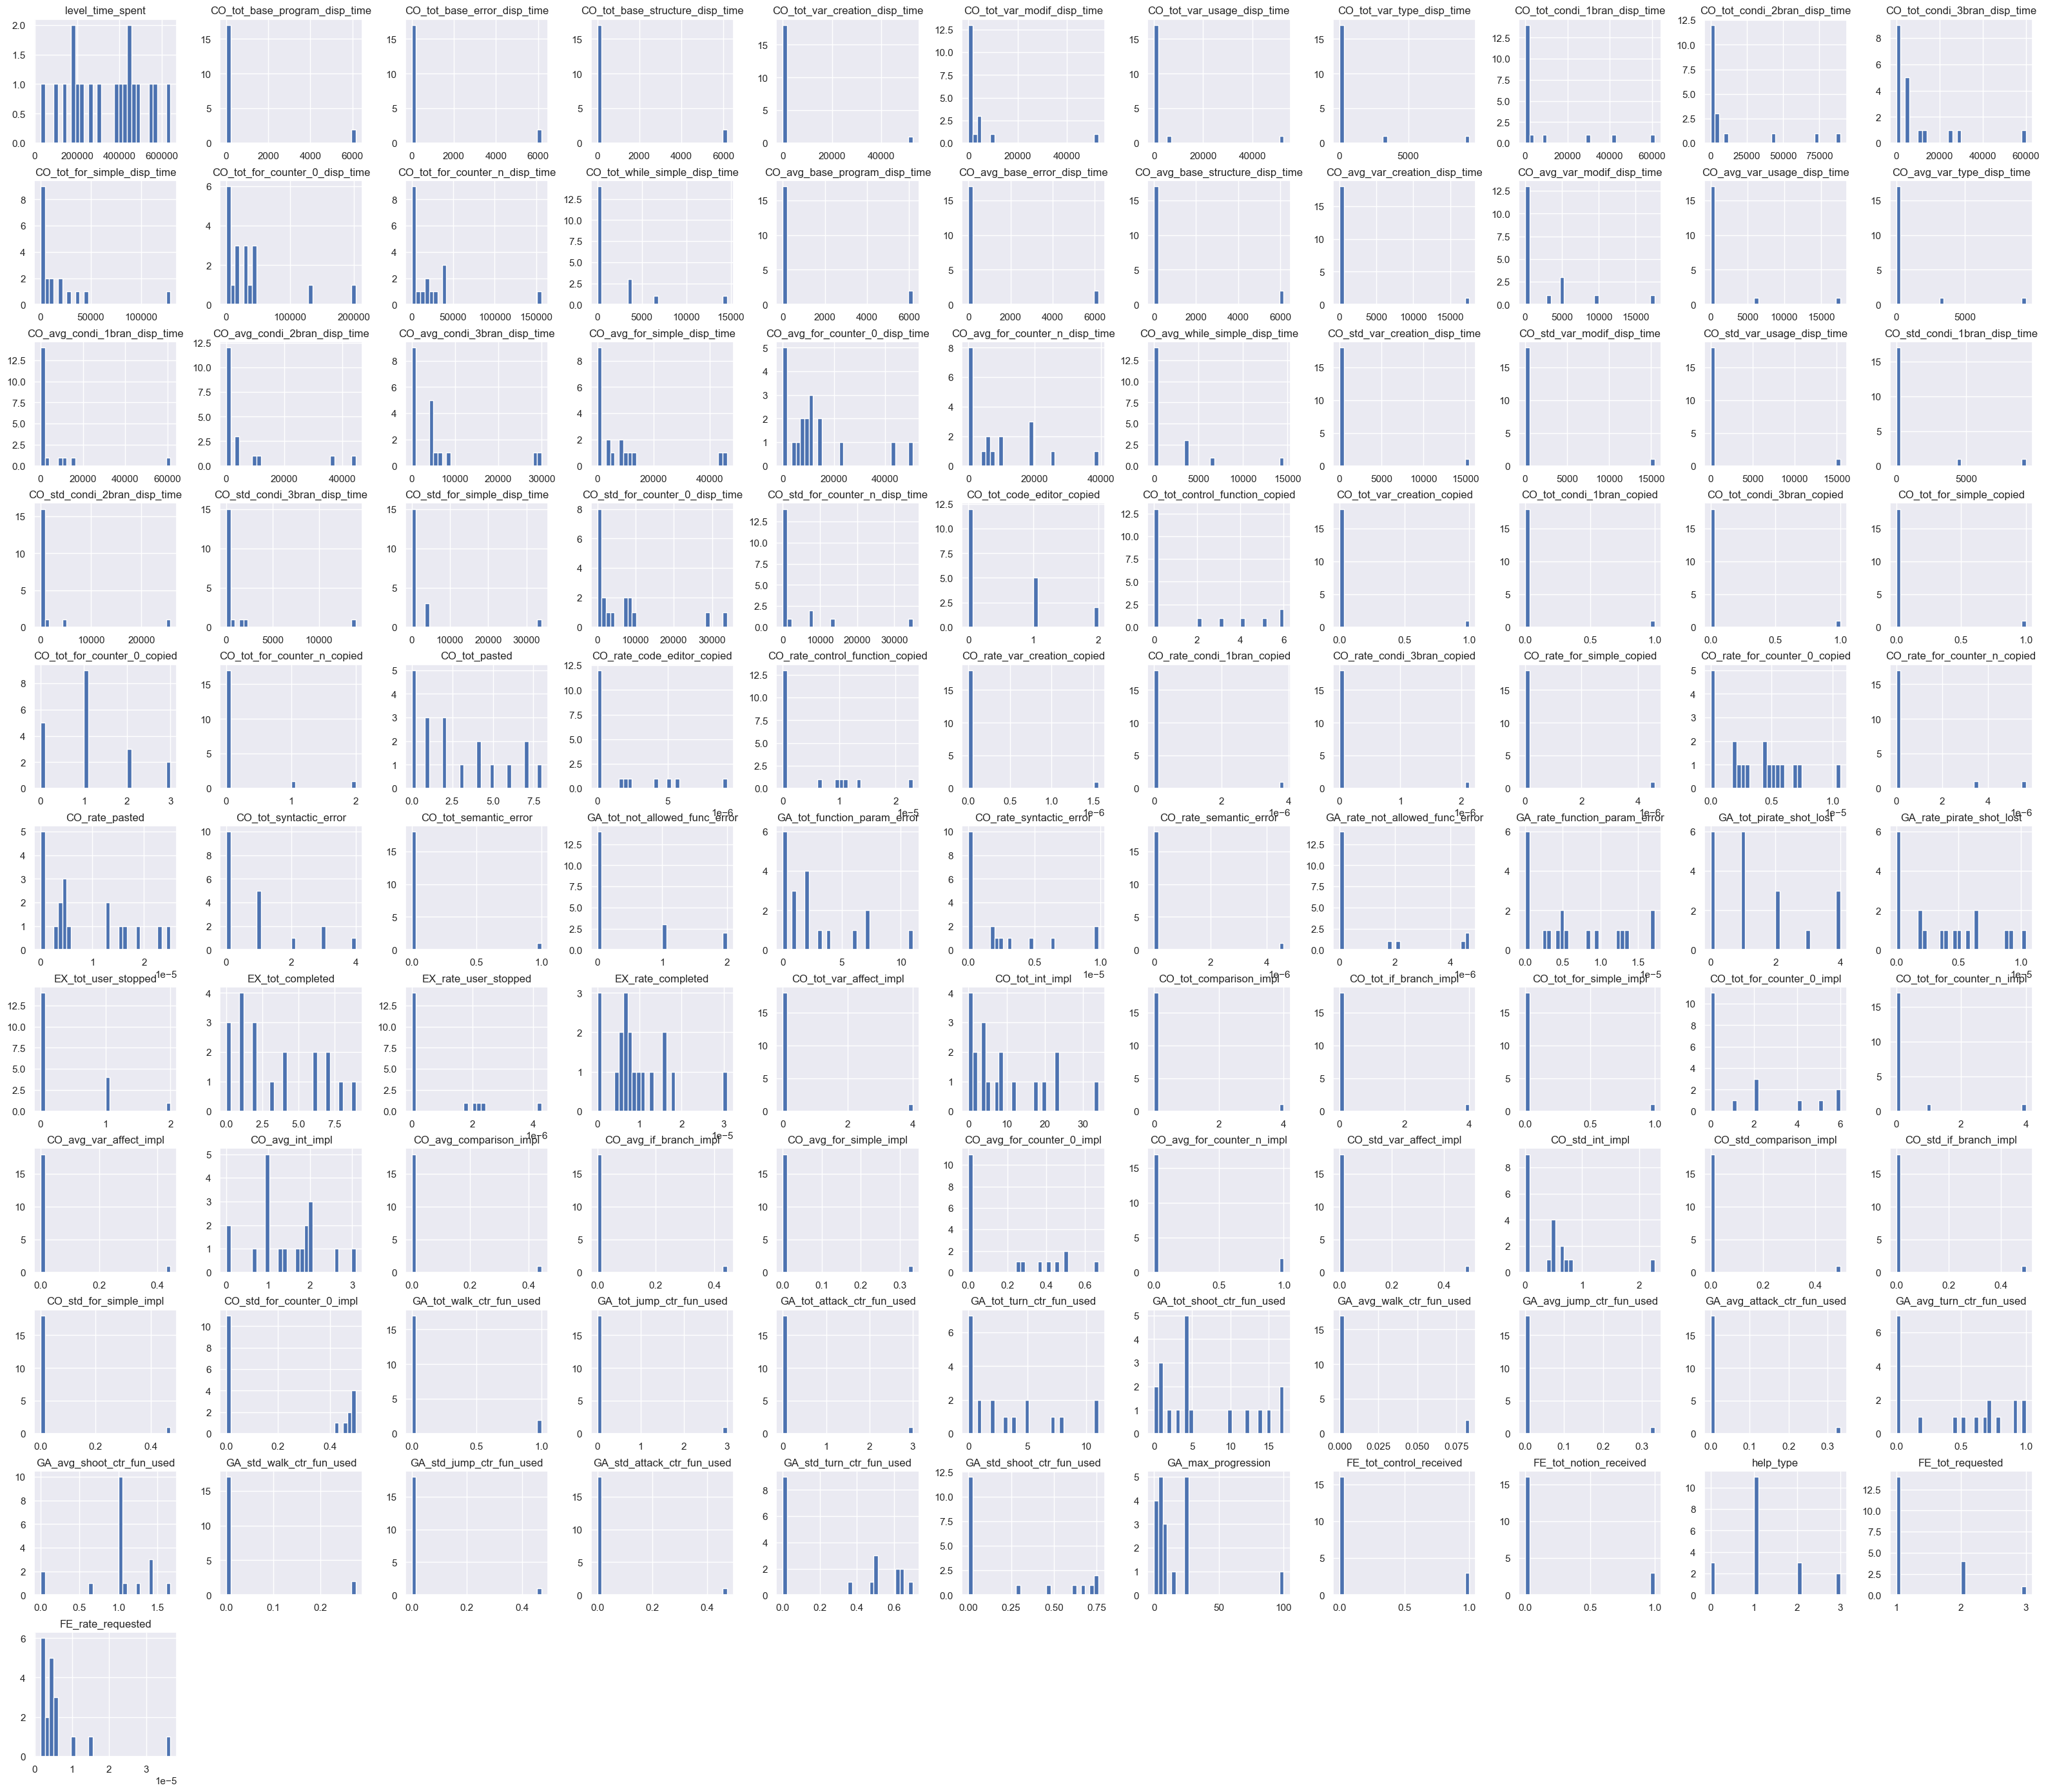

Discarded features:  ['CO_tot_base_comment_disp_time', 'CO_avg_base_comment_disp_time', 'CO_std_base_program_disp_time', 'CO_std_base_error_disp_time', 'CO_std_base_structure_disp_time', 'CO_std_base_comment_disp_time', 'CO_std_var_type_disp_time', 'CO_std_while_simple_disp_time', 'CO_tot_help_copied', 'CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_tot_var_modif_copied', 'CO_tot_var_usage_copied', 'CO_tot_var_type_copied', 'CO_tot_condi_2bran_copied', 'CO_tot_while_simple_copied', 'CO_rate_help_copied', 'CO_rate_base_program_copied', 'CO_rate_base_error_copied', 'CO_rate_base_structuration_copied', 'CO_rate_base_comment_copied', 'CO_rate_var_modif_copied', 'CO_rate_var_usage_copied', 'CO_rate_var_type_copied', 'CO_rate_condi_2bran_copied', 'CO_rate_while_simple_copied', 'CO_tot_too_many_lines_error', 'GA_tot_open_chest_loc_error', 'GA_tot_open_chest_key_error', 'GA_tot_read_message_loc_error', 'GA_tot_walk

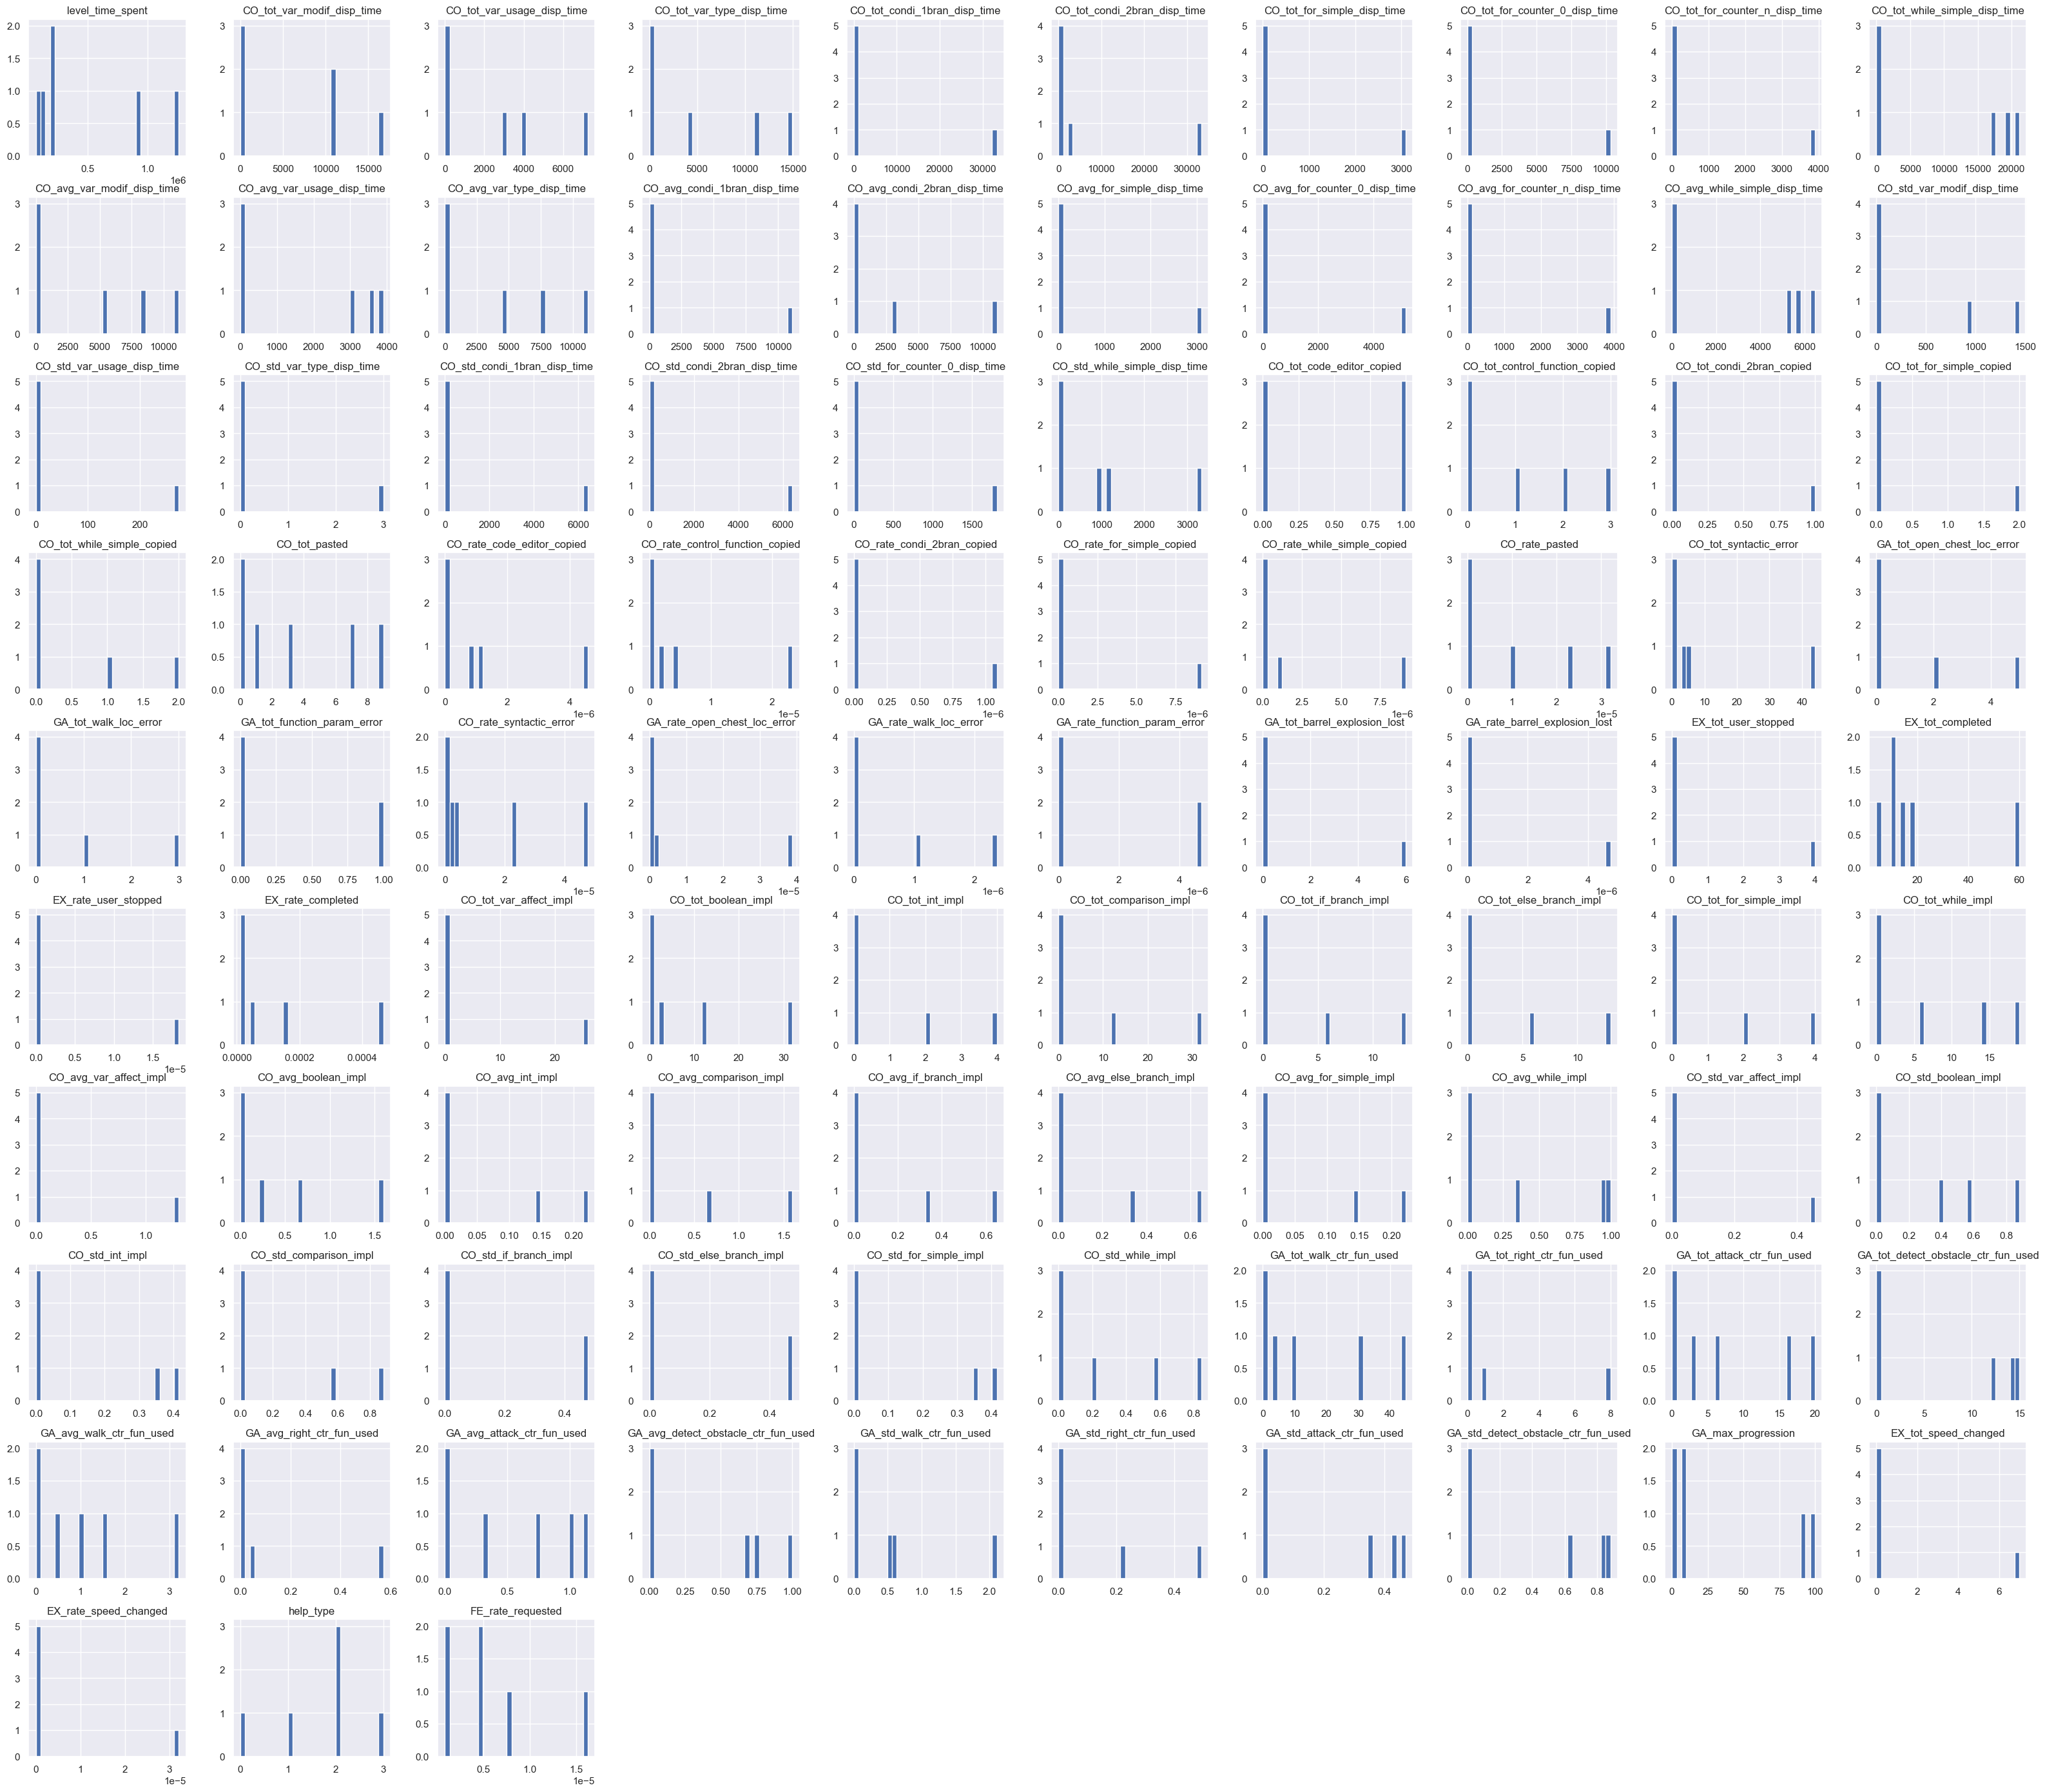

Discarded features:  ['CO_tot_base_program_disp_time', 'CO_tot_base_error_disp_time', 'CO_tot_base_structure_disp_time', 'CO_tot_base_comment_disp_time', 'CO_tot_var_creation_disp_time', 'CO_tot_condi_3bran_disp_time', 'CO_avg_base_program_disp_time', 'CO_avg_base_error_disp_time', 'CO_avg_base_structure_disp_time', 'CO_avg_base_comment_disp_time', 'CO_avg_var_creation_disp_time', 'CO_avg_condi_3bran_disp_time', 'CO_std_base_program_disp_time', 'CO_std_base_error_disp_time', 'CO_std_base_structure_disp_time', 'CO_std_base_comment_disp_time', 'CO_std_var_creation_disp_time', 'CO_std_condi_3bran_disp_time', 'CO_std_for_simple_disp_time', 'CO_std_for_counter_n_disp_time', 'CO_tot_help_copied', 'CO_tot_base_program_copied', 'CO_tot_base_error_copied', 'CO_tot_base_structuration_copied', 'CO_tot_base_comment_copied', 'CO_tot_var_creation_copied', 'CO_tot_var_modif_copied', 'CO_tot_var_usage_copied', 'CO_tot_var_type_copied', 'CO_tot_condi_1bran_copied', 'CO_tot_condi_3bran_copied', 'CO_tot_

In [15]:
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    # Drop irrelevant feature (same values) for analysis
    unused_features = []
    for key in level_processed_dataframe.columns:
        nb_values = level_processed_dataframe[key].value_counts()
        if len(nb_values) == 1: # If all the values are the same
            unused_features.append(key)
    print("Relevant features: ",len(level_processed_dataframe.columns)-len(unused_features))
    level_processed_dataframe.to_excel("data/df_"+level_key+".xlsx")
    relevant_level_processed_dataframe = level_processed_dataframe.drop(columns=unused_features)
    print("Histograms: ")
    relevant_level_processed_dataframe.hist(bins = 30, figsize =(40,35))
    plt.show()
    """print("Correlation: ") #take too long
    corr_matrix = relevant_level_processed_dataframe.corr()
    plt.figure(figsize = (40,35))
    ax = sns.heatmap(corr_matrix, annot=True)
    plt.show()"""
    print("Discarded features: ", unused_features)

## Correlation analysis among features

In [17]:
#------------
#Correlations
#------------

widget1 = widgets.Output()
for level_key, level_processed_dataframe in levels_processed_dataframes.items():
    print(f"------------------ {level_key} ------------------")
    # Drop irrelevant feature (same values) for analysis
    unused_features = []
    for key in level_processed_dataframe.columns:
        nb_values = level_processed_dataframe[key].value_counts()
        if len(nb_values) == 1: # If all the values are the same
            unused_features.append(key)
    print("Relevant features: ",len(level_processed_dataframe.columns)-len(unused_features))
    level_processed_dataframe.to_excel("data/df_"+level_key+".xlsx")
    relevant_level_processed_dataframe = level_processed_dataframe.drop(columns=unused_features)
    corr_matrix = relevant_level_processed_dataframe.corr()
    display.display(corr_matrix.round(2))
    


------------------ Level1 ------------------
Relevant features:  129


C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


level_time_spent  \
level_time_spent                             1.00   
CO_tot_base_program_disp_time                0.33   
CO_tot_base_error_disp_time                  0.35   
CO_tot_base_structure_disp_time              0.34   
CO_tot_base_comment_disp_time                0.24   
CO_tot_var_creation_disp_time                0.27   
CO_tot_var_modif_disp_time                   0.25   
CO_tot_var_usage_disp_time                   0.24   
CO_tot_var_type_disp_time                    0.24   
CO_tot_condi_1bran_disp_time                 0.24   
CO_tot_condi_2bran_disp_time                 0.27   
CO_tot_condi_3bran_disp_time                 0.22   
CO_tot_for_simple_disp_time                  0.49   
CO_tot_for_counter_0_disp_time               0.53   
CO_tot_for_counter_n_disp_time               0.34   
CO_tot_while_simple_disp_time                0.27   
CO_avg_base_program_disp_time                0.25   
CO_avg_base_error_disp_time                  0.27   
CO_avg_base_structure_disp_time              0.26   
CO_avg_base_comment_disp_time                0.20   
CO_avg_var_creation_disp_time                0.27   
CO_avg_var_modif_disp_time                   0.28   
CO_avg_var_usage_disp_time                   0.27   
CO_avg_var_type_disp_time                    0.25   
CO_avg_condi_1bran_disp_time                 0.22   
CO_avg_condi_2bran_disp_time                 0.24   
CO_avg_condi_3bran_disp_time                 0.25   
CO_avg_for_simple_disp_time                  0.41   
CO_avg_for_counter_0_disp_time               0.42   
CO_avg_for_counter_n_disp_time               0.42   
CO_avg_while_simple_disp_time                0.31   
CO_std_base_program_disp_time                0.22   
CO_std_base_error_disp_time                  0.22   
CO_std_base_structure_disp_time              0.23   
CO_std_base_comment_disp_time                0.20   
CO_std_var_creation_disp_time                0.24   
CO_std_var_modif_disp_time                   0.20   
CO_std_var_usage_disp_time                   0.21   
CO_std_var_type_disp_time                    0.21   
CO_std_condi_1bran_disp_time                 0.24   
CO_std_condi_2bran_disp_time                 0.24   
CO_std_condi_3bran_disp_time                 0.20   
CO_std_for_simple_disp_time                  0.39   
CO_std_for_counter_0_disp_time               0.40   
CO_std_for_counter_n_disp_time               0.31   
CO_std_while_simple_disp_time                0.20   
CO_tot_code_editor_copied                    0.03   
CO_tot_control_function_copied               0.03   
CO_tot_help_copied                           0.22   
CO_tot_var_creation_copied                  -0.05   
CO_tot_var_modif_copied                      0.06   
CO_tot_var_usage_copied                      0.07   
CO_tot_condi_1bran_copied                    0.11   
CO_tot_condi_2bran_copied                    0.04   
CO_tot_condi_3bran_copied                    0.06   
CO_tot_for_simple_copied                     0.22   
CO_tot_for_counter_0_copied                  0.09   
CO_tot_for_counter_n_copied                  0.12   
CO_tot_while_simple_copied                   0.23   
CO_tot_pasted                                0.12   
CO_rate_code_editor_copied                  -0.09   
CO_rate_control_function_copied             -0.03   
CO_rate_help_copied                          0.20   
CO_rate_var_creation_copied                 -0.15   
CO_rate_var_modif_copied                    -0.07   
CO_rate_var_usage_copied                     0.06   
CO_rate_condi_1bran_copied                   0.09   
CO_rate_condi_2bran_copied                   0.04   
CO_rate_condi_3bran_copied                   0.04   
CO_rate_for_simple_copied                    0.13   
CO_rate_for_counter_0_copied                 0.07   
CO_rate_for_counter_n_copied                 0.06   
CO_rate_while_simple_copied                  0.21   
CO_rate_pasted                              -0.05   
CO_tot_too_many_lines_error                  0.20   
CO_to

------------------ Level2 ------------------
Relevant features:  125


C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


level_time_spent  \
level_time_spent                             1.00   
CO_tot_base_program_disp_time               -0.00   
CO_tot_base_error_disp_time                 -0.01   
CO_tot_base_structure_disp_time             -0.02   
CO_tot_base_comment_disp_time               -0.09   
CO_tot_var_creation_disp_time                0.10   
CO_tot_var_modif_disp_time                   0.16   
CO_tot_var_usage_disp_time                   0.18   
CO_tot_var_type_disp_time                    0.12   
CO_tot_condi_1bran_disp_time                 0.28   
CO_tot_condi_2bran_disp_time                 0.26   
CO_tot_condi_3bran_disp_time                 0.22   
CO_tot_for_simple_disp_time                  0.55   
CO_tot_for_counter_0_disp_time               0.54   
CO_tot_for_counter_n_disp_time               0.41   
CO_tot_while_simple_disp_time                0.46   
CO_avg_base_program_disp_time                0.04   
CO_avg_base_error_disp_time                 -0.06   
CO_avg_base_structure_disp_time             -0.06   
CO_avg_base_comment_disp_time               -0.09   
CO_avg_var_creation_disp_time                0.17   
CO_avg_var_modif_disp_time                   0.19   
CO_avg_var_usage_disp_time                   0.22   
CO_avg_var_type_disp_time                    0.15   
CO_avg_condi_1bran_disp_time                 0.35   
CO_avg_condi_2bran_disp_time                 0.22   
CO_avg_condi_3bran_disp_time                 0.20   
CO_avg_for_simple_disp_time                  0.35   
CO_avg_for_counter_0_disp_time               0.36   
CO_avg_for_counter_n_disp_time               0.33   
CO_avg_while_simple_disp_time                0.36   
CO_std_base_program_disp_time               -0.05   
CO_std_base_error_disp_time                  0.01   
CO_std_base_structure_disp_time             -0.02   
CO_std_var_creation_disp_time               -0.04   
CO_std_var_modif_disp_time                   0.08   
CO_std_var_usage_disp_time                   0.22   
CO_std_var_type_disp_time                    0.01   
CO_std_condi_1bran_disp_time                 0.29   
CO_std_condi_2bran_disp_time                 0.29   
CO_std_condi_3bran_disp_time                 0.20   
CO_std_for_simple_disp_time                  0.26   
CO_std_for_counter_0_disp_time               0.34   
CO_std_for_counter_n_disp_time               0.45   
CO_std_while_simple_disp_time                0.41   
CO_tot_code_editor_copied                    0.44   
CO_tot_control_function_copied               0.23   
CO_tot_help_copied                           0.31   
CO_tot_var_modif_copied                     -0.05   
CO_tot_condi_1bran_copied                    0.17   
CO_tot_condi_2bran_copied                    0.34   
CO_tot_condi_3bran_copied                    0.21   
CO_tot_for_simple_copied                     0.41   
CO_tot_for_counter_0_copied                  0.16   
CO_tot_for_counter_n_copied                  0.31   
CO_tot_while_simple_copied                   0.44   
CO_tot_pasted                                0.57   
CO_rate_code_editor_copied                   0.39   
CO_rate_control_function_copied              0.15   
CO_rate_help_copied                          0.31   
CO_rate_var_modif_copied                    -0.05   
CO_rate_condi_1bran_copied                   0.13   
CO_rate_condi_2bran_copied                   0.28   
CO_rate_condi_3bran_copied                  -0.07   
CO_rate_for_simple_copied                    0.23   
CO_rate_for_counter_0_copied                -0.03   
CO_rate_for_counter_n_copied                 0.27   
CO_rate_while_simple_copied                  0.37   
CO_rate_pasted                               0.24   
CO_tot_too_many_lines_error                  0.21   
CO_tot_syntactic_error                       0.62   
CO_tot_semantic_error                        0.19   
GA_tot_open_chest_loc_error                  0.19   
GA_tot_walk_loc_error                        0.04   
GA_tot_not_allowed_func_error                0.40   
GA_to

------------------ Level3 ------------------
Relevant features:  149


C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


level_time_spent  \
level_time_spent                             1.00   
CO_tot_base_program_disp_time                0.01   
CO_tot_base_error_disp_time                  0.03   
CO_tot_base_structure_disp_time              0.04   
CO_tot_base_comment_disp_time                0.04   
CO_tot_var_creation_disp_time                0.44   
CO_tot_var_modif_disp_time                   0.45   
CO_tot_var_usage_disp_time                   0.44   
CO_tot_var_type_disp_time                    0.39   
CO_tot_condi_1bran_disp_time                 0.11   
CO_tot_condi_2bran_disp_time                 0.10   
CO_tot_condi_3bran_disp_time                 0.09   
CO_tot_for_simple_disp_time                  0.30   
CO_tot_for_counter_0_disp_time               0.22   
CO_tot_for_counter_n_disp_time               0.12   
CO_tot_while_simple_disp_time                0.15   
CO_avg_base_program_disp_time               -0.00   
CO_avg_base_error_disp_time                  0.02   
CO_avg_base_structure_disp_time              0.02   
CO_avg_base_comment_disp_time                0.05   
CO_avg_var_creation_disp_time                0.38   
CO_avg_var_modif_disp_time                   0.30   
CO_avg_var_usage_disp_time                   0.34   
CO_avg_var_type_disp_time                    0.29   
CO_avg_condi_1bran_disp_time                 0.11   
CO_avg_condi_2bran_disp_time                 0.11   
CO_avg_condi_3bran_disp_time                 0.11   
CO_avg_for_simple_disp_time                  0.23   
CO_avg_for_counter_0_disp_time               0.16   
CO_avg_for_counter_n_disp_time               0.11   
CO_avg_while_simple_disp_time                0.11   
CO_std_base_program_disp_time                0.04   
CO_std_base_error_disp_time                  0.05   
CO_std_base_structure_disp_time              0.05   
CO_std_base_comment_disp_time               -0.00   
CO_std_var_creation_disp_time                0.37   
CO_std_var_modif_disp_time                   0.35   
CO_std_var_usage_disp_time                   0.37   
CO_std_var_type_disp_time                    0.28   
CO_std_condi_1bran_disp_time                 0.08   
CO_std_condi_2bran_disp_time                 0.06   
CO_std_condi_3bran_disp_time                 0.04   
CO_std_for_simple_disp_time                  0.28   
CO_std_for_counter_0_disp_time               0.18   
CO_std_for_counter_n_disp_time               0.04   
CO_std_while_simple_disp_time                0.10   
CO_tot_code_editor_copied                    0.18   
CO_tot_control_function_copied               0.05   
CO_tot_help_copied                           0.38   
CO_tot_var_creation_copied                   0.26   
CO_tot_var_modif_copied                      0.22   
CO_tot_var_usage_copied                      0.25   
CO_tot_condi_1bran_copied                   -0.00   
CO_tot_condi_2bran_copied                    0.04   
CO_tot_condi_3bran_copied                   -0.01   
CO_tot_for_simple_copied                     0.26   
CO_tot_for_counter_0_copied                  0.13   
CO_tot_for_counter_n_copied                  0.01   
CO_tot_while_simple_copied                   0.07   
CO_tot_pasted                                0.30   
CO_rate_code_editor_copied                  -0.20   
CO_rate_control_function_copied             -0.18   
CO_rate_help_copied                          0.29   
CO_rate_var_creation_copied                  0.13   
CO_rate_var_modif_copied                     0.01   
CO_rate_var_usage_copied                    -0.05   
CO_rate_condi_1bran_copied                  -0.09   
CO_rate_condi_2bran_copied                   0.03   
CO_rate_condi_3bran_copied                  -0.02   
CO_rate_for_simple_copied                   -0.19   
CO_rate_for_counter_0_copied                 0.02   
CO_rate_for_counter_n_copied                -0.11   
CO_rate_while_simple_copied                 -0.10   
CO_rate_pasted                              -0.20   
CO_tot_too_many_lines_error                  0.30   
CO_to

------------------ Level4 ------------------
Relevant features:  165


C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


level_time_spent  \
level_time_spent                             1.00   
CO_tot_base_program_disp_time               -0.03   
CO_tot_base_error_disp_time                 -0.04   
CO_tot_base_structure_disp_time             -0.04   
CO_tot_base_comment_disp_time               -0.01   
CO_tot_var_creation_disp_time                0.22   
CO_tot_var_modif_disp_time                   0.30   
CO_tot_var_usage_disp_time                   0.26   
CO_tot_var_type_disp_time                    0.30   
CO_tot_condi_1bran_disp_time                 0.40   
CO_tot_condi_2bran_disp_time                 0.40   
CO_tot_condi_3bran_disp_time                 0.26   
CO_tot_for_simple_disp_time                  0.41   
CO_tot_for_counter_0_disp_time               0.34   
CO_tot_for_counter_n_disp_time               0.16   
CO_tot_while_simple_disp_time                0.18   
CO_avg_base_program_disp_time               -0.04   
CO_avg_base_error_disp_time                 -0.05   
CO_avg_base_structure_disp_time             -0.05   
CO_avg_base_comment_disp_time               -0.02   
CO_avg_var_creation_disp_time                0.18   
CO_avg_var_modif_disp_time                   0.16   
CO_avg_var_usage_disp_time                   0.18   
CO_avg_var_type_disp_time                    0.17   
CO_avg_condi_1bran_disp_time                 0.21   
CO_avg_condi_2bran_disp_time                 0.21   
CO_avg_condi_3bran_disp_time                 0.15   
CO_avg_for_simple_disp_time                  0.24   
CO_avg_for_counter_0_disp_time               0.21   
CO_avg_for_counter_n_disp_time               0.13   
CO_avg_while_simple_disp_time                0.16   
CO_std_base_program_disp_time               -0.01   
CO_std_base_error_disp_time                 -0.01   
CO_std_base_structure_disp_time             -0.01   
CO_std_base_comment_disp_time                0.02   
CO_std_var_creation_disp_time                0.17   
CO_std_var_modif_disp_time                   0.25   
CO_std_var_usage_disp_time                   0.20   
CO_std_var_type_disp_time                    0.25   
CO_std_condi_1bran_disp_time                 0.32   
CO_std_condi_2bran_disp_time                 0.29   
CO_std_condi_3bran_disp_time                 0.16   
CO_std_for_simple_disp_time                  0.29   
CO_std_for_counter_0_disp_time               0.27   
CO_std_for_counter_n_disp_time               0.12   
CO_std_while_simple_disp_time                0.15   
CO_tot_code_editor_copied                    0.16   
CO_tot_control_function_copied               0.09   
CO_tot_help_copied                           0.30   
CO_tot_var_creation_copied                   0.05   
CO_tot_var_modif_copied                      0.06   
CO_tot_var_usage_copied                      0.10   
CO_tot_var_type_copied                      -0.03   
CO_tot_condi_1bran_copied                    0.18   
CO_tot_condi_2bran_copied                    0.38   
CO_tot_condi_3bran_copied                    0.05   
CO_tot_for_simple_copied                     0.34   
CO_tot_for_counter_0_copied                  0.02   
CO_tot_for_counter_n_copied                 -0.01   
CO_tot_while_simple_copied                   0.12   
CO_tot_pasted                                0.31   
CO_rate_code_editor_copied                  -0.10   
CO_rate_control_function_copied             -0.15   
CO_rate_help_copied                          0.22   
CO_rate_var_creation_copied                 -0.06   
CO_rate_var_modif_copied                    -0.08   
CO_rate_var_usage_copied                    -0.15   
CO_rate_var_type_copied                     -0.03   
CO_rate_condi_1bran_copied                   0.00   
CO_rate_condi_2bran_copied                   0.05   
CO_rate_condi_3bran_copied                  -0.09   
CO_rate_for_simple_copied                   -0.16   
CO_rate_for_counter_0_copied                -0.07   
CO_rate_for_counter_n_copied                -0.05   
CO_rate_while_simple_copied                  0.03   
CO_ra

------------------ Level5 ------------------
Relevant features:  154


C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


level_time_spent  \
level_time_spent                             1.00   
CO_tot_base_program_disp_time                0.25   
CO_tot_base_error_disp_time                  0.26   
CO_tot_base_structure_disp_time              0.21   
CO_tot_base_comment_disp_time                0.10   
CO_tot_var_creation_disp_time                0.19   
CO_tot_var_modif_disp_time                   0.20   
CO_tot_var_usage_disp_time                   0.17   
CO_tot_var_type_disp_time                    0.13   
CO_tot_condi_1bran_disp_time                 0.39   
CO_tot_condi_2bran_disp_time                 0.48   
CO_tot_condi_3bran_disp_time                 0.26   
CO_tot_for_simple_disp_time                  0.30   
CO_tot_for_counter_0_disp_time               0.33   
CO_tot_for_counter_n_disp_time               0.27   
CO_tot_while_simple_disp_time                0.09   
CO_avg_base_program_disp_time                0.25   
CO_avg_base_error_disp_time                  0.26   
CO_avg_base_structure_disp_time              0.21   
CO_avg_base_comment_disp_time                0.10   
CO_avg_var_creation_disp_time                0.17   
CO_avg_var_modif_disp_time                   0.13   
CO_avg_var_usage_disp_time                   0.17   
CO_avg_var_type_disp_time                    0.10   
CO_avg_condi_1bran_disp_time                 0.40   
CO_avg_condi_2bran_disp_time                 0.35   
CO_avg_condi_3bran_disp_time                 0.21   
CO_avg_for_simple_disp_time                  0.29   
CO_avg_for_counter_0_disp_time               0.27   
CO_avg_for_counter_n_disp_time               0.23   
CO_avg_while_simple_disp_time                0.08   
CO_std_var_creation_disp_time                0.17   
CO_std_var_modif_disp_time                   0.20   
CO_std_var_usage_disp_time                   0.14   
CO_std_var_type_disp_time                    0.11   
CO_std_condi_1bran_disp_time                 0.36   
CO_std_condi_2bran_disp_time                 0.39   
CO_std_condi_3bran_disp_time                 0.19   
CO_std_for_simple_disp_time                  0.22   
CO_std_for_counter_0_disp_time               0.28   
CO_std_for_counter_n_disp_time               0.23   
CO_std_while_simple_disp_time               -0.03   
CO_tot_code_editor_copied                    0.15   
CO_tot_control_function_copied               0.02   
CO_tot_help_copied                           0.07   
CO_tot_var_creation_copied                   0.24   
CO_tot_var_modif_copied                      0.12   
CO_tot_var_usage_copied                      0.15   
CO_tot_condi_1bran_copied                    0.04   
CO_tot_condi_2bran_copied                    0.10   
CO_tot_condi_3bran_copied                    0.27   
CO_tot_for_simple_copied                     0.24   
CO_tot_for_counter_0_copied                  0.21   
CO_tot_for_counter_n_copied                  0.18   
CO_tot_while_simple_copied                   0.17   
CO_tot_pasted                                0.27   
CO_rate_code_editor_copied                  -0.19   
CO_rate_control_function_copied             -0.18   
CO_rate_help_copied                         -0.11   
CO_rate_var_creation_copied                 -0.08   
CO_rate_var_modif_copied                    -0.00   
CO_rate_var_usage_copied                     0.06   
CO_rate_condi_1bran_copied                  -0.08   
CO_rate_condi_2bran_copied                  -0.08   
CO_rate_condi_3bran_copied                  -0.20   
CO_rate_for_simple_copied                   -0.29   
CO_rate_for_counter_0_copied                 0.11   
CO_rate_for_counter_n_copied                 0.18   
CO_rate_while_simple_copied                  0.03   
CO_rate_pasted                              -0.28   
CO_tot_too_many_lines_error                  0.11   
CO_tot_syntactic_error                       0.14   
CO_tot_semantic_error                        0.19   
GA_tot_open_chest_loc_error                  0.12   
GA_tot_walk_loc_error                        0.13   
GA_to

------------------ Level6 ------------------
Relevant features:  126


C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


level_time_spent  \
level_time_spent                             1.00   
CO_tot_base_program_disp_time                0.38   
CO_tot_base_error_disp_time                  0.38   
CO_tot_base_structure_disp_time              0.38   
CO_tot_base_comment_disp_time                0.41   
CO_tot_var_creation_disp_time                0.31   
CO_tot_var_modif_disp_time                   0.35   
CO_tot_var_usage_disp_time                   0.38   
CO_tot_var_type_disp_time                    0.37   
CO_tot_condi_1bran_disp_time                 0.30   
CO_tot_condi_2bran_disp_time                 0.26   
CO_tot_condi_3bran_disp_time                 0.24   
CO_tot_for_simple_disp_time                  0.56   
CO_tot_for_counter_0_disp_time               0.64   
CO_tot_for_counter_n_disp_time               0.59   
CO_tot_while_simple_disp_time                0.27   
CO_avg_base_program_disp_time                0.38   
CO_avg_base_error_disp_time                  0.38   
CO_avg_base_structure_disp_time              0.38   
CO_avg_base_comment_disp_time                0.45   
CO_avg_var_creation_disp_time                0.28   
CO_avg_var_modif_disp_time                   0.25   
CO_avg_var_usage_disp_time                   0.28   
CO_avg_var_type_disp_time                    0.24   
CO_avg_condi_1bran_disp_time                 0.31   
CO_avg_condi_2bran_disp_time                 0.25   
CO_avg_condi_3bran_disp_time                 0.23   
CO_avg_for_simple_disp_time                  0.41   
CO_avg_for_counter_0_disp_time               0.31   
CO_avg_for_counter_n_disp_time               0.48   
CO_avg_while_simple_disp_time                0.32   
CO_std_base_comment_disp_time               -0.03   
CO_std_var_creation_disp_time                0.13   
CO_std_var_modif_disp_time                   0.17   
CO_std_var_usage_disp_time                   0.22   
CO_std_var_type_disp_time                    0.35   
CO_std_condi_1bran_disp_time                 0.31   
CO_std_condi_2bran_disp_time                 0.20   
CO_std_condi_3bran_disp_time                 0.21   
CO_std_for_simple_disp_time                  0.45   
CO_std_for_counter_0_disp_time               0.50   
CO_std_for_counter_n_disp_time               0.50   
CO_std_while_simple_disp_time                0.25   
CO_tot_code_editor_copied                    0.16   
CO_tot_control_function_copied               0.19   
CO_tot_var_creation_copied                  -0.17   
CO_tot_var_modif_copied                      0.15   
CO_tot_var_usage_copied                     -0.07   
CO_tot_condi_1bran_copied                    0.04   
CO_tot_condi_2bran_copied                    0.17   
CO_tot_condi_3bran_copied                   -0.01   
CO_tot_for_simple_copied                     0.44   
CO_tot_for_counter_0_copied                  0.16   
CO_tot_for_counter_n_copied                  0.28   
CO_tot_while_simple_copied                  -0.03   
CO_tot_pasted                                0.32   
CO_rate_code_editor_copied                  -0.20   
CO_rate_control_function_copied              0.03   
CO_rate_var_creation_copied                 -0.17   
CO_rate_var_modif_copied                     0.05   
CO_rate_var_usage_copied                    -0.16   
CO_rate_condi_1bran_copied                  -0.03   
CO_rate_condi_2bran_copied                   0.11   
CO_rate_condi_3bran_copied                  -0.06   
CO_rate_for_simple_copied                   -0.12   
CO_rate_for_counter_0_copied                -0.10   
CO_rate_for_counter_n_copied                -0.18   
CO_rate_while_simple_copied                 -0.24   
CO_rate_pasted                              -0.37   
CO_tot_too_many_lines_error                  0.19   
CO_tot_syntactic_error                       0.54   
CO_tot_semantic_error                        0.21   
GA_tot_open_chest_loc_error                  0.35   
GA_tot_walk_loc_error                        0.47   
GA_tot_not_allowed_func_error                0.04   
GA_to

------------------ Level7 ------------------
Relevant features:  112


C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


level_time_spent  \
level_time_spent                             1.00   
CO_tot_base_program_disp_time                0.20   
CO_tot_base_error_disp_time                  0.20   
CO_tot_base_structure_disp_time              0.20   
CO_tot_var_creation_disp_time                0.42   
CO_tot_var_modif_disp_time                   0.49   
CO_tot_var_usage_disp_time                   0.44   
CO_tot_var_type_disp_time                    0.17   
CO_tot_condi_1bran_disp_time                 0.06   
CO_tot_condi_2bran_disp_time                -0.02   
CO_tot_condi_3bran_disp_time                 0.02   
CO_tot_for_simple_disp_time                  0.65   
CO_tot_for_counter_0_disp_time               0.59   
CO_tot_for_counter_n_disp_time               0.36   
CO_tot_while_simple_disp_time                0.51   
CO_avg_base_program_disp_time                0.20   
CO_avg_base_error_disp_time                  0.20   
CO_avg_base_structure_disp_time              0.20   
CO_avg_var_creation_disp_time                0.42   
CO_avg_var_modif_disp_time                   0.56   
CO_avg_var_usage_disp_time                   0.48   
CO_avg_var_type_disp_time                    0.17   
CO_avg_condi_1bran_disp_time                 0.18   
CO_avg_condi_2bran_disp_time                 0.02   
CO_avg_condi_3bran_disp_time                 0.11   
CO_avg_for_simple_disp_time                  0.67   
CO_avg_for_counter_0_disp_time               0.50   
CO_avg_for_counter_n_disp_time               0.20   
CO_avg_while_simple_disp_time                0.51   
CO_std_var_creation_disp_time                0.42   
CO_std_var_modif_disp_time                   0.42   
CO_std_var_usage_disp_time                   0.42   
CO_std_condi_1bran_disp_time                -0.22   
CO_std_condi_2bran_disp_time                 0.19   
CO_std_condi_3bran_disp_time                -0.17   
CO_std_for_simple_disp_time                  0.49   
CO_std_for_counter_0_disp_time               0.62   
CO_std_for_counter_n_disp_time               0.28   
CO_tot_code_editor_copied                    0.10   
CO_tot_control_function_copied               0.30   
CO_tot_var_creation_copied                   0.42   
CO_tot_condi_1bran_copied                   -0.11   
CO_tot_condi_3bran_copied                    0.18   
CO_tot_for_simple_copied                    -0.17   
CO_tot_for_counter_0_copied                  0.55   
CO_tot_for_counter_n_copied                  0.18   
CO_tot_pasted                                0.47   
CO_rate_code_editor_copied                  -0.14   
CO_rate_control_function_copied              0.06   
CO_rate_var_creation_copied                  0.42   
CO_rate_condi_1bran_copied                  -0.11   
CO_rate_condi_3bran_copied                   0.18   
CO_rate_for_simple_copied                   -0.17   
CO_rate_for_counter_0_copied                -0.15   
CO_rate_for_counter_n_copied                -0.02   
CO_rate_pasted                               0.04   
CO_tot_syntactic_error                       0.42   
CO_tot_semantic_error                       -0.17   
GA_tot_not_allowed_func_error                0.29   
GA_tot_function_param_error                  0.73   
CO_rate_syntactic_error                      0.27   
CO_rate_semantic_error                      -0.17   
GA_rate_not_allowed_func_error               0.19   
GA_rate_function_param_error                 0.52   
GA_tot_pirate_shot_lost                      0.45   
GA_rate_pirate_shot_lost                     0.29   
EX_tot_user_stopped                          0.46   
EX_tot_completed                             0.63   
EX_rate_user_stopped                         0.44   
EX_rate_completed                            0.22   
CO_tot_var_affect_impl                      -0.11   
CO_tot_int_impl                              0.50   
CO_tot_comparison_impl                      -0.11   
CO_tot_if_branch_impl                       -0.11   
CO_tot_for_simple_impl                      -0.17   
CO_to

C:\Users\Sebastien\AppData\Local\Temp\ipykernel_7908\2801533022.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_level_processed_dataframe.corr()


------------------ Level8 ------------------
Relevant features:  94


level_time_spent  \
level_time_spent                                 1.00   
CO_tot_var_modif_disp_time                       0.86   
CO_tot_var_usage_disp_time                       0.36   
CO_tot_var_type_disp_time                        0.97   
CO_tot_condi_1bran_disp_time                     0.44   
CO_tot_condi_2bran_disp_time                     0.43   
CO_tot_for_simple_disp_time                     -0.24   
CO_tot_for_counter_0_disp_time                  -0.24   
CO_tot_for_counter_n_disp_time                  -0.24   
CO_tot_while_simple_disp_time                    0.81   
CO_avg_var_modif_disp_time                       0.85   
CO_avg_var_usage_disp_time                       0.74   
CO_avg_var_type_disp_time                        0.84   
CO_avg_condi_1bran_disp_time                     0.44   
CO_avg_condi_2bran_disp_time                     0.38   
CO_avg_for_simple_disp_time                     -0.24   
CO_avg_for_counter_0_disp_time                  -0.24   
CO_avg_for_counter_n_disp_time                  -0.24   
CO_avg_while_simple_disp_time                    0.72   
CO_std_var_modif_disp_time                       0.24   
CO_std_var_usage_disp_time                      -0.24   
CO_std_var_type_disp_time                        0.78   
CO_std_condi_1bran_disp_time                     0.44   
CO_std_condi_2bran_disp_time                     0.44   
CO_std_for_counter_0_disp_time                  -0.24   
CO_std_while_simple_disp_time                    0.60   
CO_tot_code_editor_copied                        0.73   
CO_tot_control_function_copied                  -0.11   
CO_tot_condi_2bran_copied                        0.44   
CO_tot_for_simple_copied                        -0.24   
CO_tot_while_simple_copied                      -0.02   
CO_tot_pasted                                    0.22   
CO_rate_code_editor_copied                      -0.00   
CO_rate_control_function_copied                 -0.35   
CO_rate_condi_2bran_copied                       0.44   
CO_rate_for_simple_copied                       -0.24   
CO_rate_while_simple_copied                     -0.19   
CO_rate_pasted                                  -0.32   
CO_tot_syntactic_error                           0.50   
GA_tot_open_chest_loc_error                     -0.15   
GA_tot_walk_loc_error                            0.94   
GA_tot_function_param_error                     -0.39   
CO_rate_syntactic_error                          0.36   
GA_rate_open_chest_loc_error                    -0.31   
GA_rate_walk_loc_error                           0.97   
GA_rate_function_param_error                    -0.39   
GA_tot_barrel_explosion_lost                     0.78   
GA_rate_barrel_explosion_lost                    0.78   
EX_tot_user_stopped                             -0.24   
EX_tot_completed                                -0.17   
EX_rate_user_stopped                            -0.24   
EX_rate_completed                               -0.50   
CO_tot_var_affect_impl                           0.78   
CO_tot_boolean_impl                              0.95   
CO_tot_int_impl                                  0.31   
CO_tot_comparison_impl                           0.95   
CO_tot_if_branch_impl                            0.97   
CO_tot_else_branch_impl                          0.97   
CO_tot_for_simple_impl                           0.31   
CO_tot_while_impl                                0.70   
CO_avg_var_affect_impl                           0.78   
CO_avg_boolean_impl                              0.96   
CO_avg_int_impl                                  0.27   
CO_avg_comparison_impl                           0.96   
CO_avg_if_branch_impl                            0.98   
CO_avg_else_branch_impl                          0.98   
CO_avg_for_simple_impl                           0.27   
CO_avg_while_impl                                0.55   
CO_std_var_affect_impl                           0.78   
CO_std_boolean_impl                            